**Preparation**

In [1]:
import pandas as pd
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns
import scipy.stats
import pylab 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Conv1D
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import math
from prophet import Prophet
from colorama import Fore

c:\Users\alireza dehghan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'''import pandas as pd

# Load the Excel data into a DataFrame
data = pd.read_excel("Alireza.xlsx", sheet_name='Sheet2')

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame with a complete date range
start_date = data['Date'].min()
end_date = data['Date'].max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
complete_data = pd.DataFrame({'Date': complete_date_range})

# Merge the original data with the complete date range DataFrame
merged_data = complete_data.merge(data, on='Date', how='left')

# Fill missing values with 0 in the 'Number of Something' column
merged_data['New Account'].fillna(0, inplace=True)

# Optionally, sort the DataFrame by date
merged_data.sort_values(by='Date', inplace=True)

# Save the repaired data to a new Excel file
merged_data.to_excel("repaired_data.xlsx", index=False)'''


'import pandas as pd\n\n# Load the Excel data into a DataFrame\ndata = pd.read_excel("Alireza.xlsx", sheet_name=\'Sheet2\')\n\n# Convert the \'Date\' column to a datetime format\ndata[\'Date\'] = pd.to_datetime(data[\'Date\'])\n\n# Create a new DataFrame with a complete date range\nstart_date = data[\'Date\'].min()\nend_date = data[\'Date\'].max()\ncomplete_date_range = pd.date_range(start=start_date, end=end_date, freq=\'D\')\ncomplete_data = pd.DataFrame({\'Date\': complete_date_range})\n\n# Merge the original data with the complete date range DataFrame\nmerged_data = complete_data.merge(data, on=\'Date\', how=\'left\')\n\n# Fill missing values with 0 in the \'Number of Something\' column\nmerged_data[\'New Account\'].fillna(0, inplace=True)\n\n# Optionally, sort the DataFrame by date\nmerged_data.sort_values(by=\'Date\', inplace=True)\n\n# Save the repaired data to a new Excel file\nmerged_data.to_excel("repaired_data.xlsx", index=False)'

In [ ]:
'''# Load the Excel data into a DataFrame
data = pd.read_excel("Alireza.xlsx", sheet_name='Sheet3')

# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame with a complete date range
start_date = data['Date'].min()
end_date = data['Date'].max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
complete_data = pd.DataFrame({'Date': complete_date_range})

# Merge the original data with the complete date range DataFrame
merged_data = complete_data.merge(data, on='Date', how='left')

# Fill missing values with 0 in the 'Number of Something' column
merged_data['Churned Accounts'].fillna(0, inplace=True)

# Optionally, sort the DataFrame by date
merged_data.sort_values(by='Date', inplace=True)

# Save the repaired data to a new Excel file
merged_data.to_excel("repaired_data2.xlsx", index=False)'''

'# Load the Excel data into a DataFrame\ndata = pd.read_excel("Alireza.xlsx", sheet_name=\'Sheet3\')\n\n# Convert the \'Date\' column to a datetime format\ndata[\'Date\'] = pd.to_datetime(data[\'Date\'])\n\n# Create a new DataFrame with a complete date range\nstart_date = data[\'Date\'].min()\nend_date = data[\'Date\'].max()\ncomplete_date_range = pd.date_range(start=start_date, end=end_date, freq=\'D\')\ncomplete_data = pd.DataFrame({\'Date\': complete_date_range})\n\n# Merge the original data with the complete date range DataFrame\nmerged_data = complete_data.merge(data, on=\'Date\', how=\'left\')\n\n# Fill missing values with 0 in the \'Number of Something\' column\nmerged_data[\'Churned Accounts\'].fillna(0, inplace=True)\n\n# Optionally, sort the DataFrame by date\nmerged_data.sort_values(by=\'Date\', inplace=True)\n\n# Save the repaired data to a new Excel file\nmerged_data.to_excel("repaired_data2.xlsx", index=False)'

In [ ]:
import pandas as pd
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns
import scipy.stats
import pylab 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data')

In [ ]:
df.head(10)

,Date,Active Account,New Account,Churned Account,Potential Customer,Deal Added,Succeed Deal,Dollar Price
0,2022-09-26 17:30:00.000,1521,4,4,29,11541,6394,31681
1,2022-09-27 17:30:00.850,1494,0,1,16,3176,315,32190
2,2022-09-28 17:30:00.657,1505,5,5,29,6132,2019,31831
3,2022-09-29 17:30:00.563,1506,2,3,29,5611,2297,31848
4,2022-09-30 17:30:00.900,1465,1,1,14,886,259,31848
5,2022-10-01 17:30:01.140,1520,4,0,52,8498,2269,33117
6,2022-10-02 17:30:00.550,1529,8,3,69,9187,2231,33146
7,2022-10-03 17:30:00.483,1544,5,0,55,6832,2082,33246
8,2022-10-04 17:30:00.520,1541,6,6,42,6177,2018,33102
9,2022-10-05 17:30:00.960,1524,1,2,20,1681,510,33102


In [ ]:
df.isnull().sum()

Date                  0
Active Account        0
New Account           0
Churned Account       0
Potential Customer    0
Deal Added            0
Succeed Deal          0
Dollar Price          0
dtype: int64

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [ ]:
#df.columns

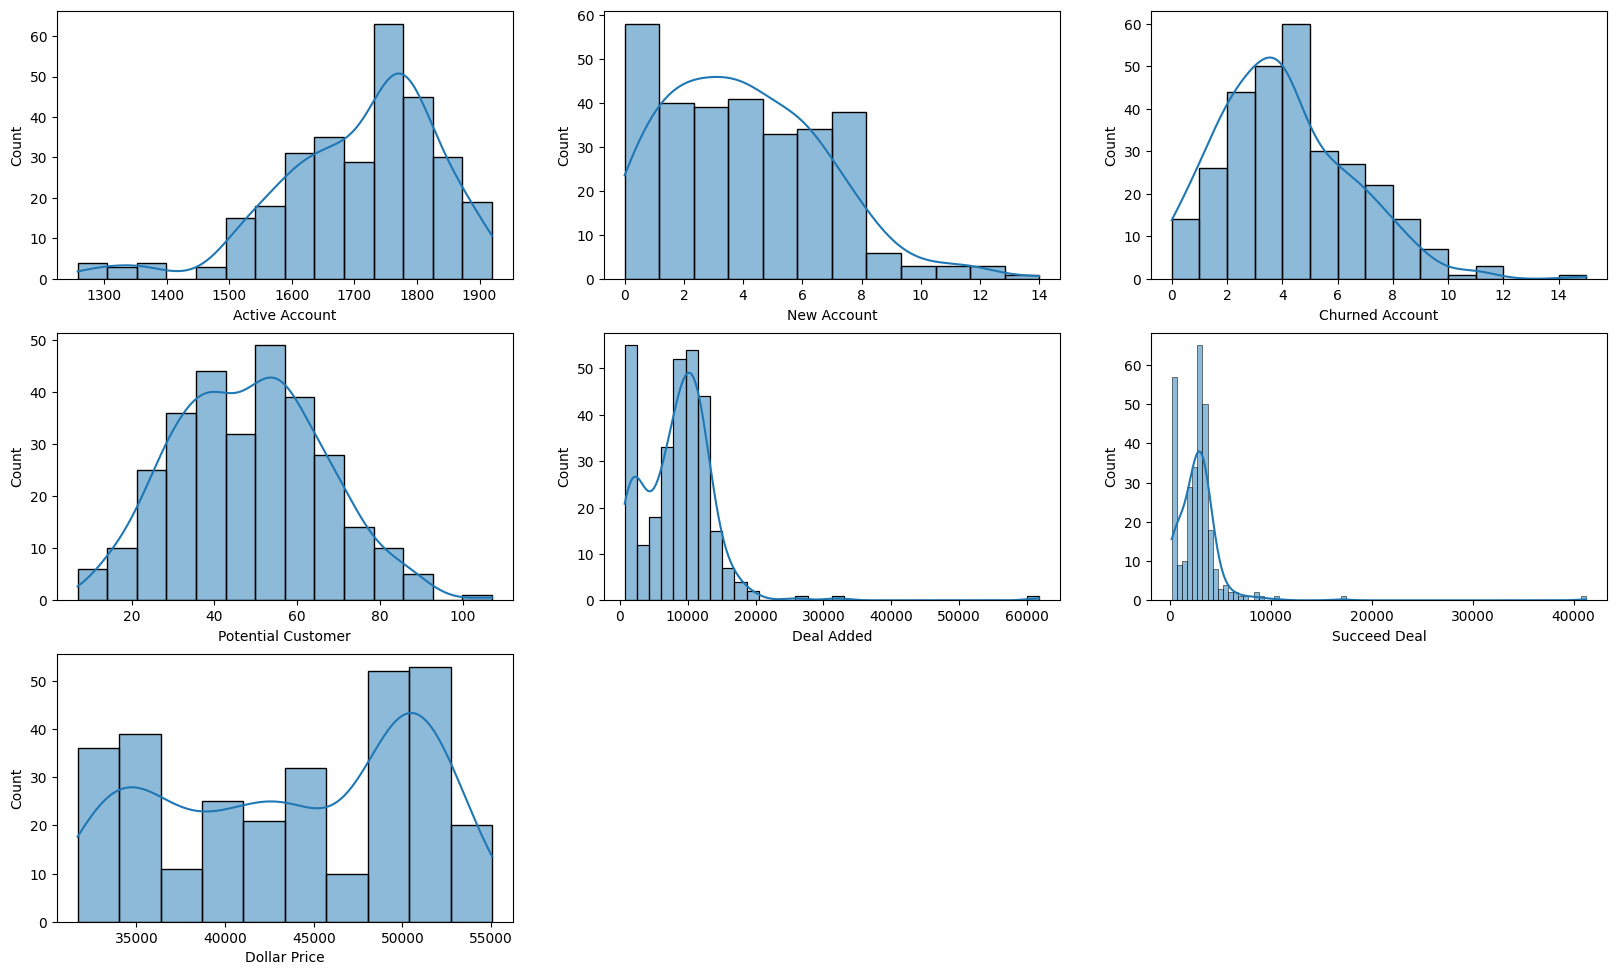

In [ ]:
dfcol = ['Active Account', 'New Account', 'Churned Account',
       'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']
# Set the figure size
plt.figure(figsize=(20, 16))

for i, col in enumerate(dfcol):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)  # Set kde=False to plot count instead of density
    plt.xlabel(col)
    plt.ylabel('Count')

plt.show()

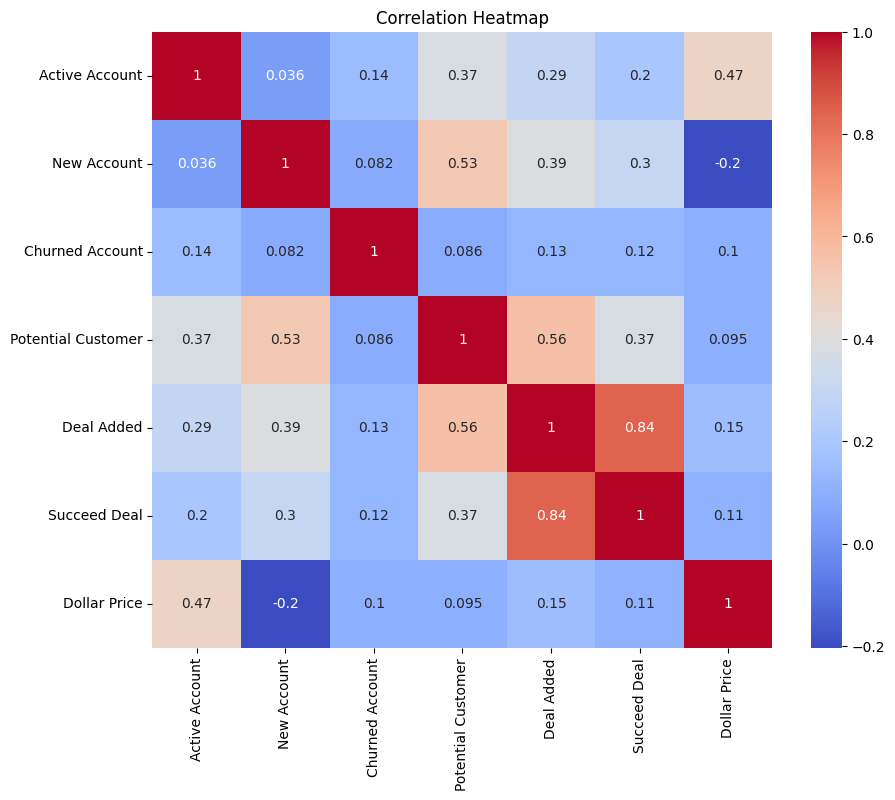

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Date', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


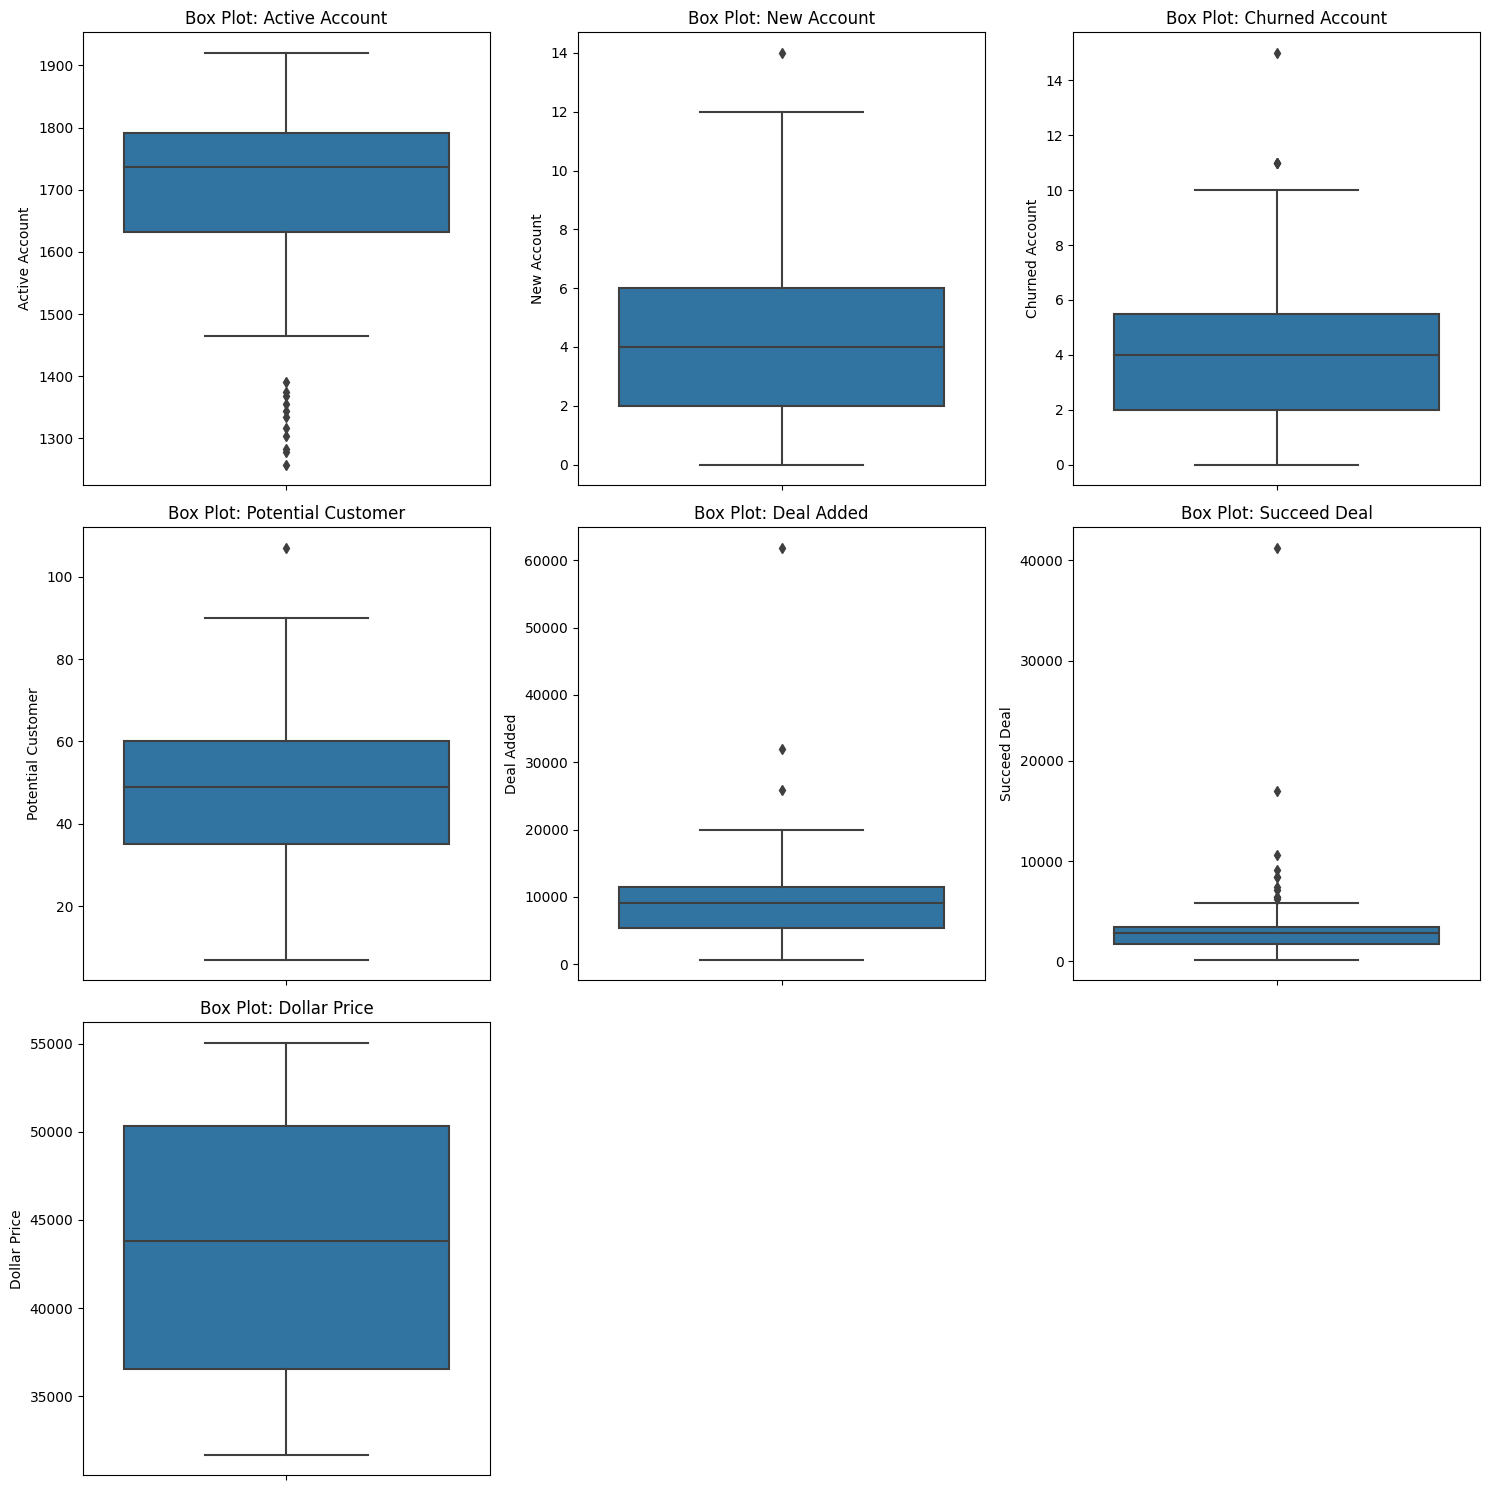

In [ ]:
# Separate box plots for each numeric column
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols_per_row = 3  # Number of box plots per row
num_rows = (len(numeric_columns) - 1) // num_cols_per_row + 1

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f"Box Plot: {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


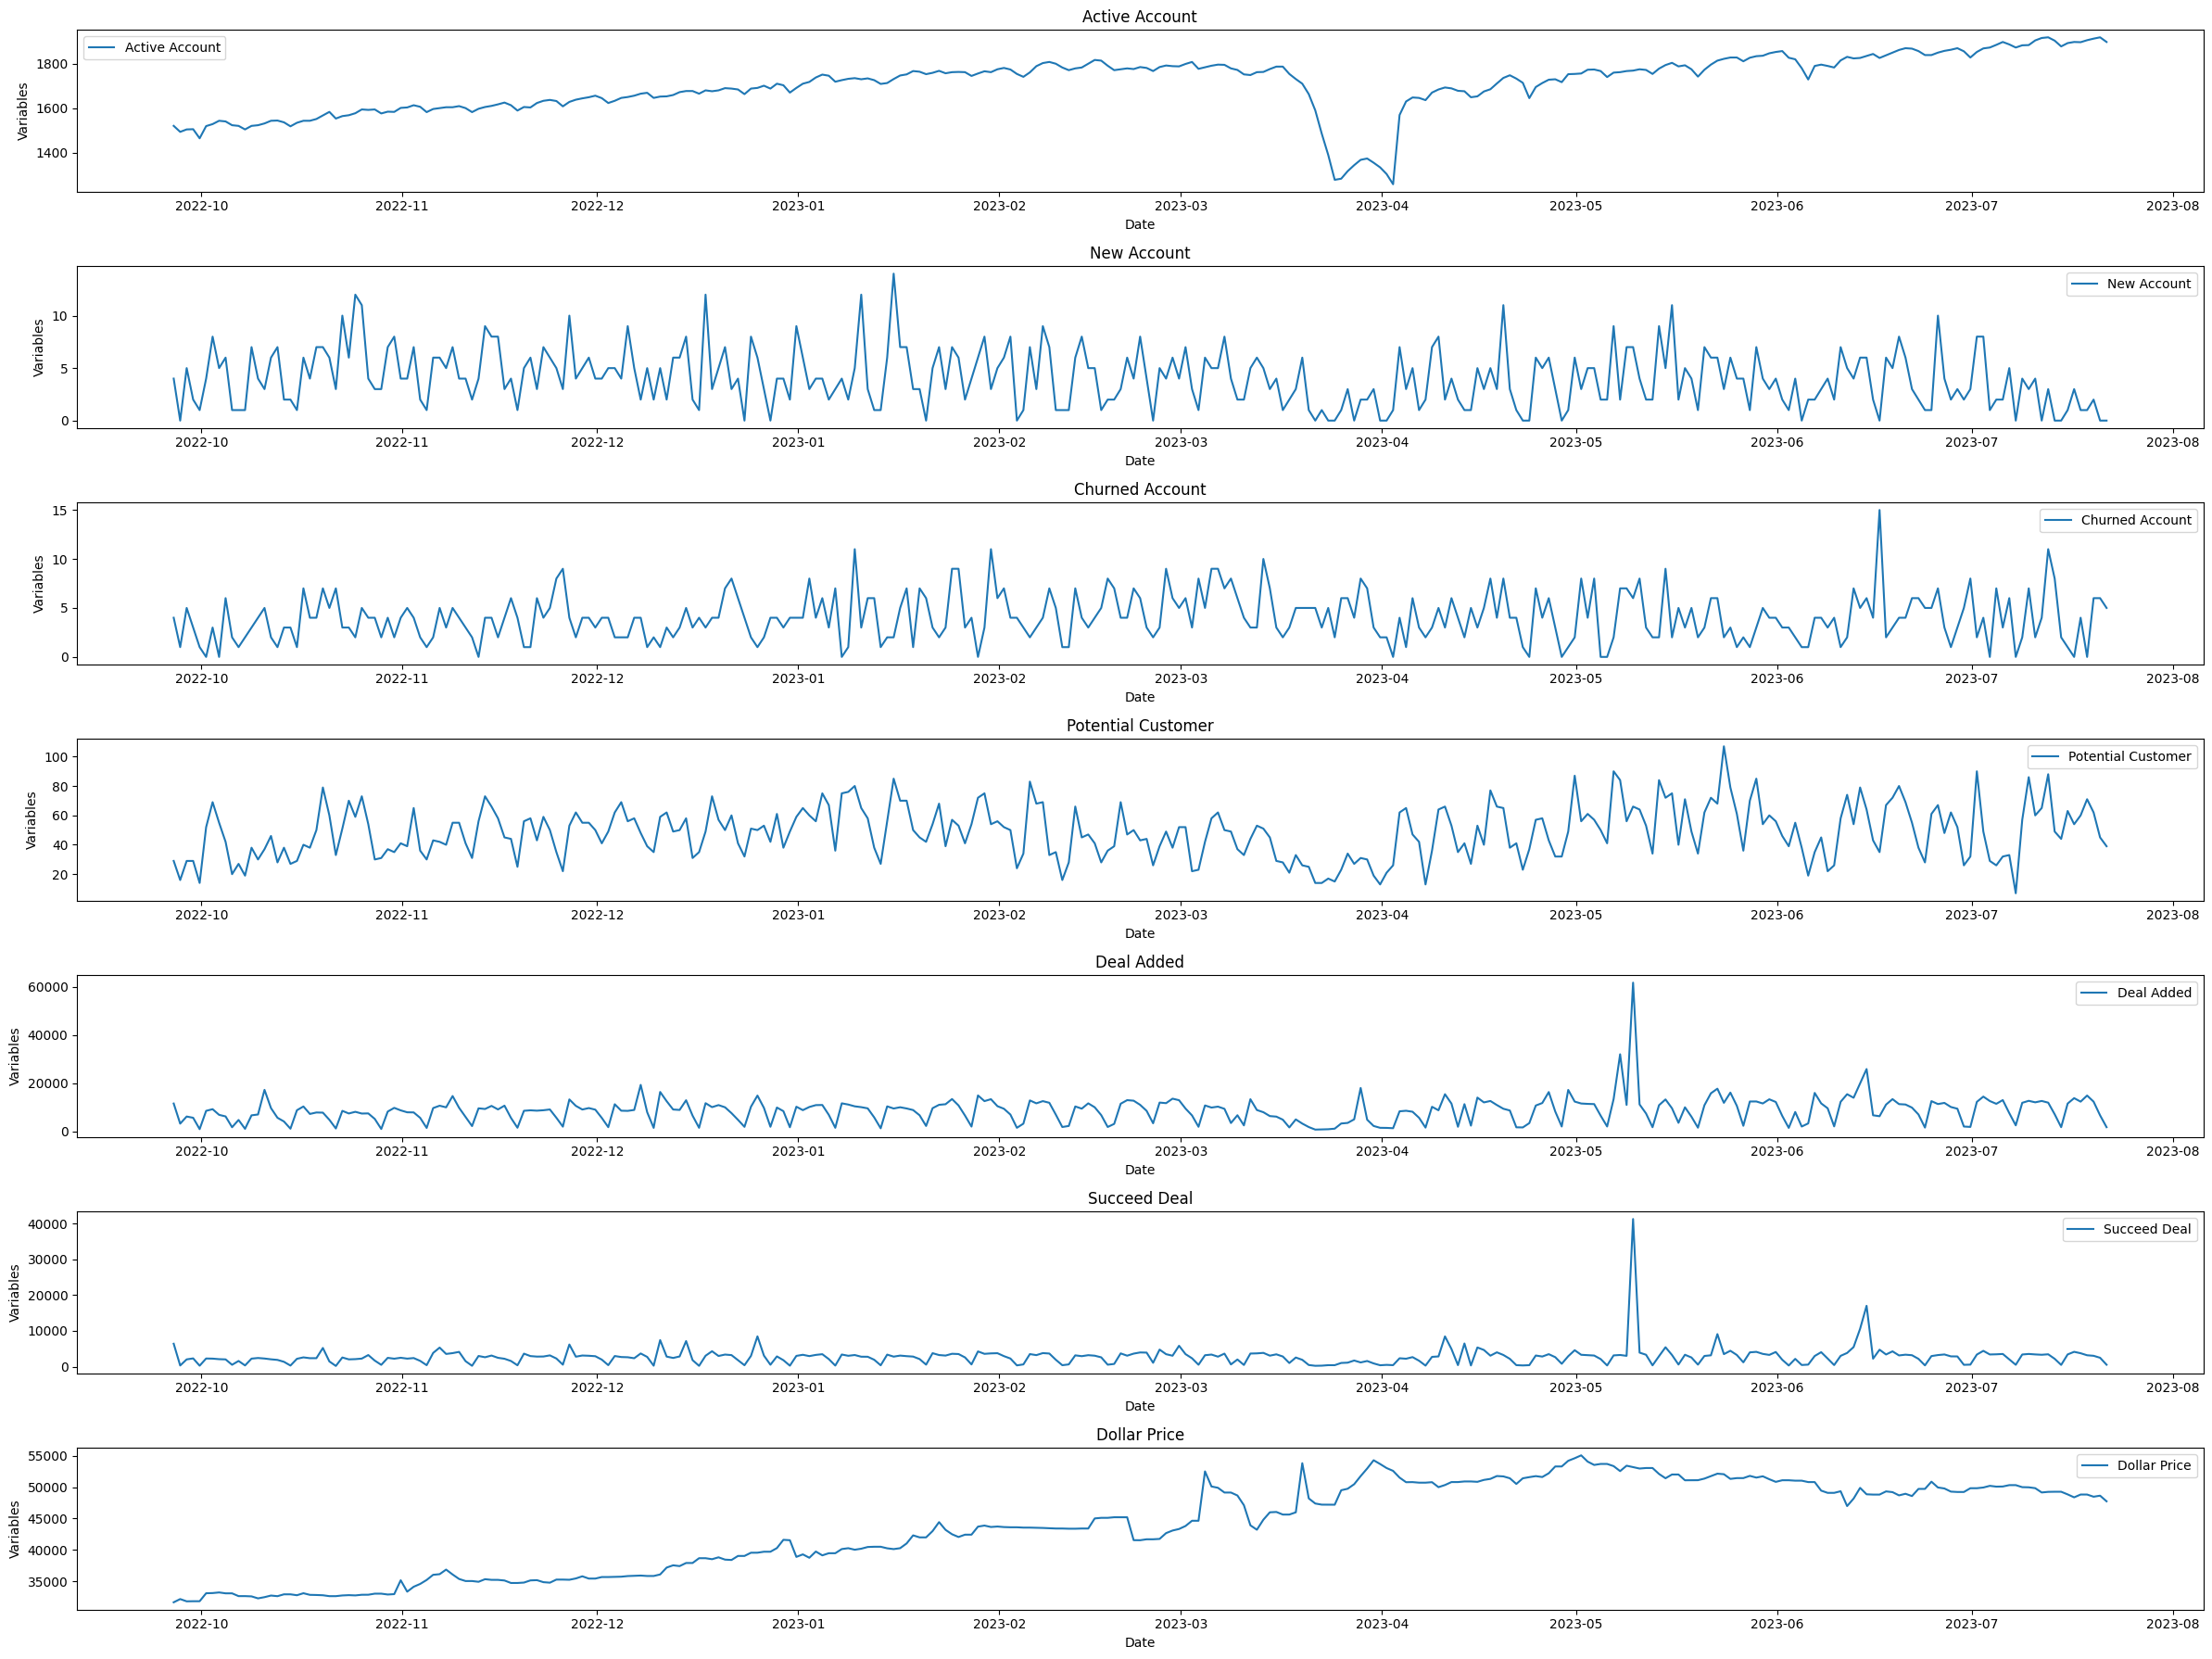

In [ ]:
plt.figure(figsize=(24, 18))

# List of metrics to plot
metrics = ['Active Account', 'New Account', 'Churned Account',
           'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    plt.plot(df['Date'], df[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Variables')
    plt.title(metric)
    plt.legend()

# Adjust space between subplots for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
core_columns =  metrics

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal


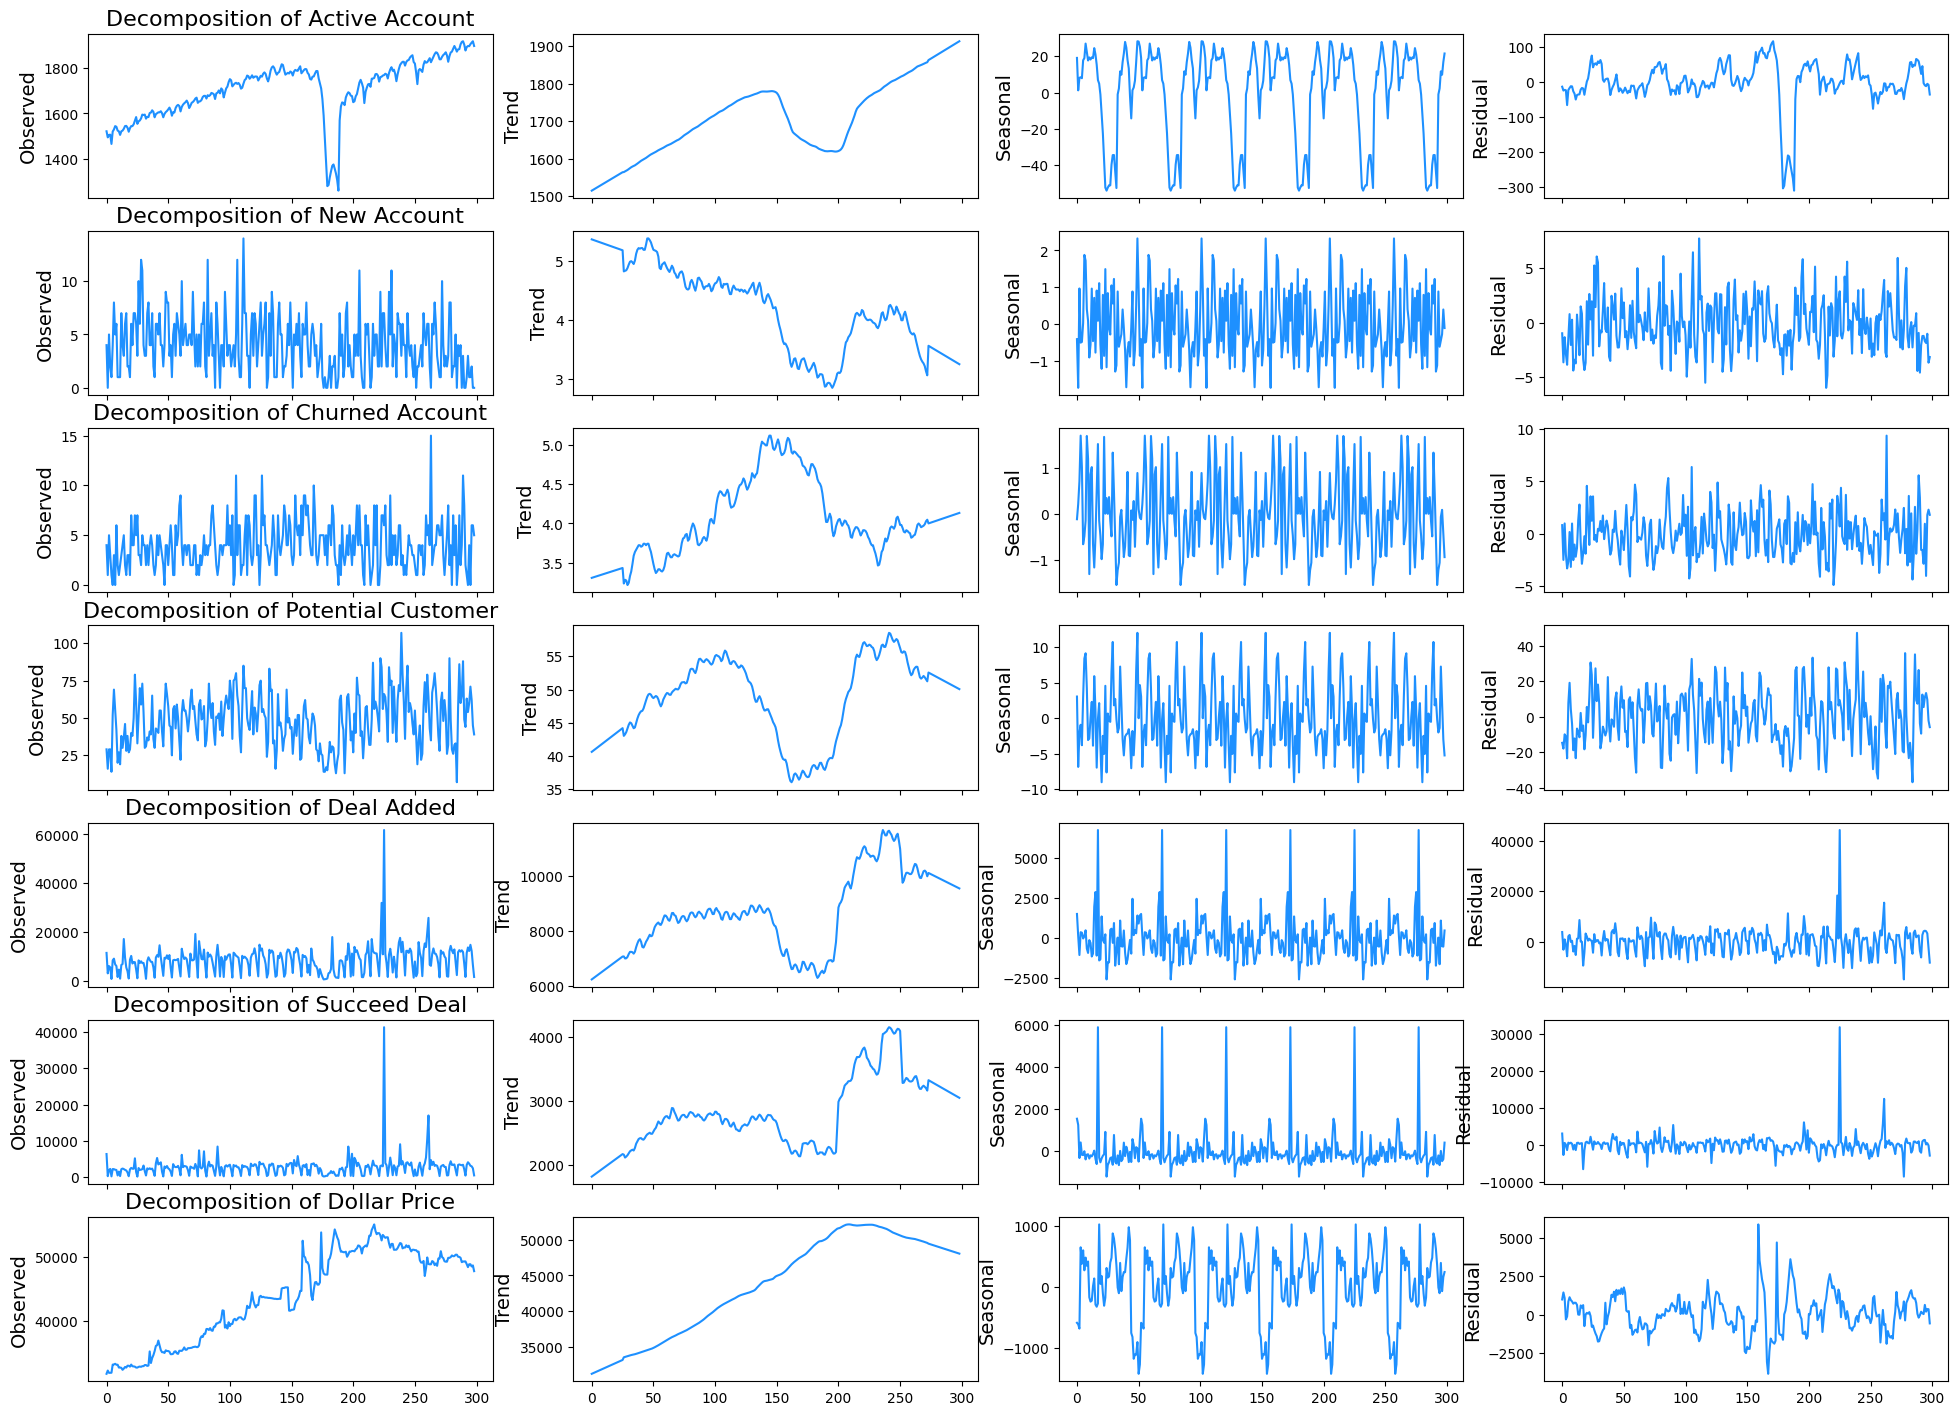

In [ ]:
fig, ax = plt.subplots(nrows=len(metrics), ncols=4, sharex=True, figsize=(24, 2.5*len(metrics)))

for i, column in enumerate(metrics):
    
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[i,0].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[i,0], legend=False, color='dodgerblue')
    ax[i,0].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[i,1], legend=False, color='dodgerblue')
    ax[i,1].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[i,2], legend=False, color='dodgerblue')
    ax[i,2].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[i,3], legend=False, color='dodgerblue')
    ax[i,3].set_ylabel('Residual', fontsize=14)

plt.show()


In [ ]:
#Outliers Treatment

<Axes: >

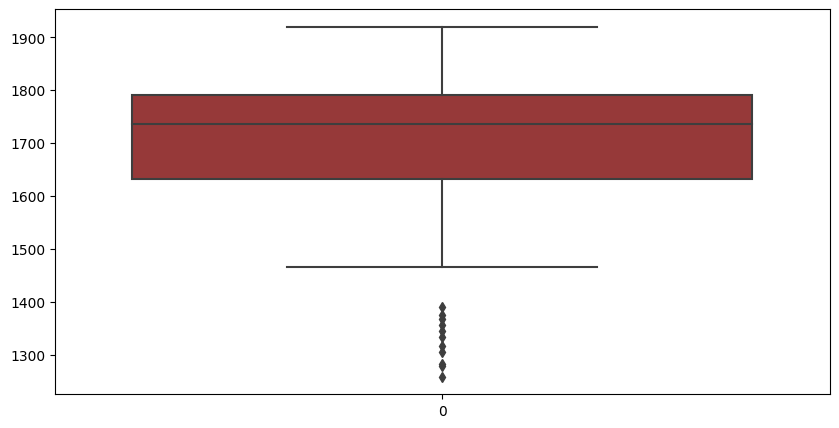

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(df['Active Account'], color='brown')

In [ ]:
df['Active Account'].sort_values(ascending = False).tail(25)

6      1529
13     1524
9      1524
12     1521
10     1521
0      1521
5      1520
18     1519
3      1506
2      1505
11     1505
1      1494
177    1486
4      1465
178    1390
184    1374
183    1368
185    1355
182    1344
186    1334
181    1317
187    1304
180    1283
179    1278
188    1258
Name: Active Account, dtype: int64

In [ ]:
df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14216\1883902993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Active Account'].loc[(df['Active Account']<=1390)] = None


<Axes: >

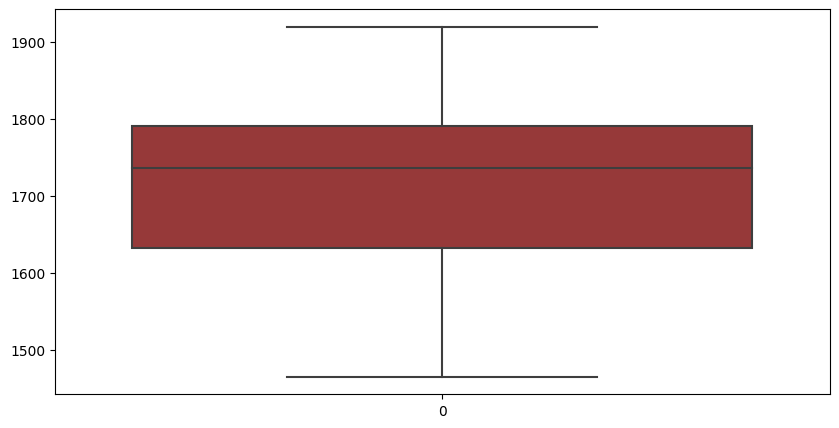

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxplot(df['Active Account'], color='brown')

In [ ]:
df['Active Account'].sort_values(ascending = False).tail(25)

8      1541.0
17     1537.0
19     1535.0
184    1535.0
14     1532.0
6      1529.0
183    1528.0
9      1524.0
13     1524.0
182    1521.0
10     1521.0
12     1521.0
0      1521.0
5      1520.0
18     1519.0
181    1514.0
180    1507.0
3      1506.0
11     1505.0
2      1505.0
179    1500.0
1      1494.0
178    1493.0
177    1486.0
4      1465.0
Name: Active Account, dtype: float64

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14216\905987525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Active Account'])


<Axes: xlabel='Active Account', ylabel='Density'>

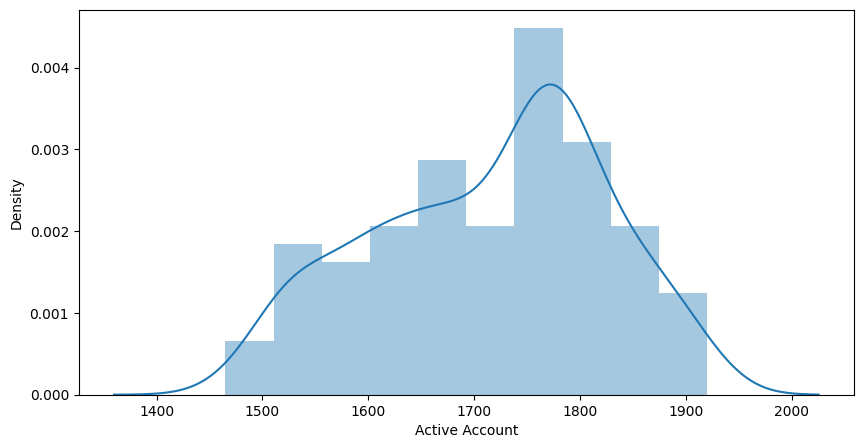

In [ ]:
sns.distplot(df['Active Account'])

((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

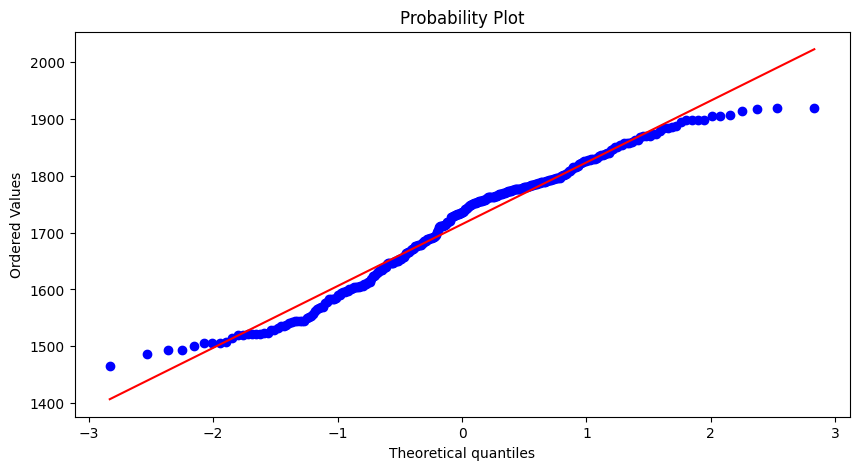

In [ ]:
scipy.stats.probplot(df['Active Account'],plot=pylab)

<Axes: >

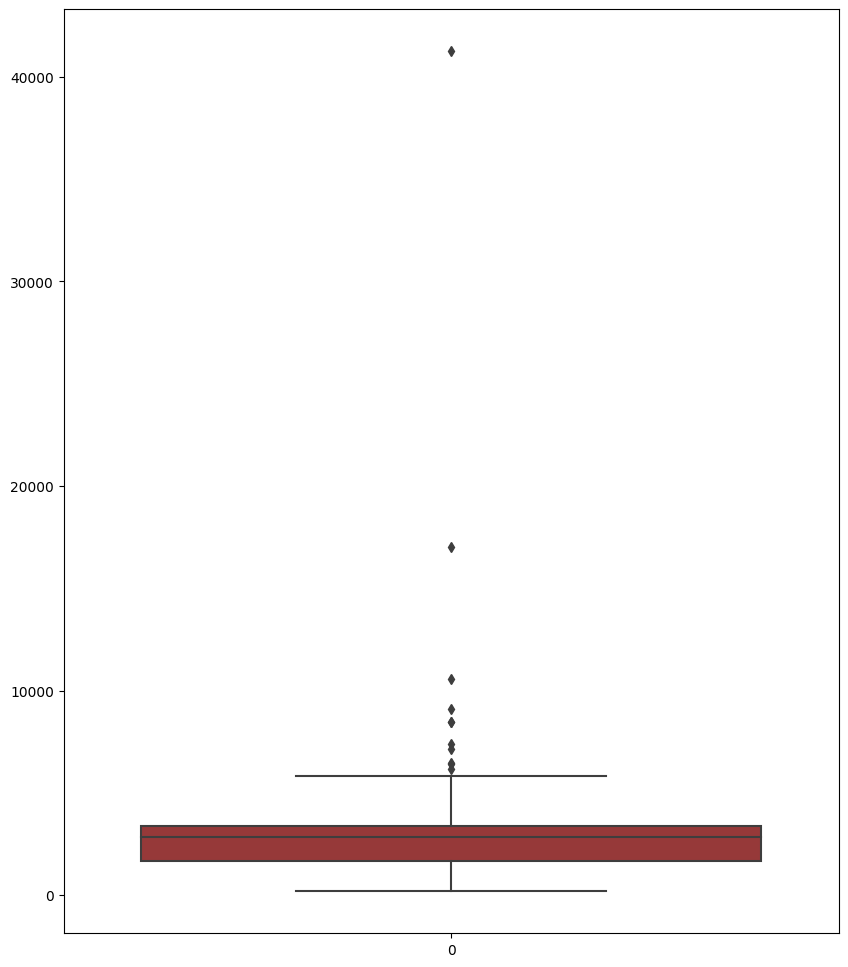

In [ ]:
plt.rcParams['figure.figsize']=(10,12)
sns.boxplot(df['Succeed Deal'], color='brown')

In [ ]:
df['Succeed Deal'].sort_values(ascending = False).head(25)

225    41246
261    16995
260    10570
238     9082
90      8451
196     8443
75      7408
79      7142
199     6468
0       6394
61      6181
155     5826
259     5465
230     5416
201     5351
41      5314
23      5216
197     4921
152     4759
263     4731
202     4651
216     4581
240     4430
279     4407
83      4299
Name: Succeed Deal, dtype: int64

In [ ]:
df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None 
df['Succeed Deal'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14216\1800708485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None


<Axes: >

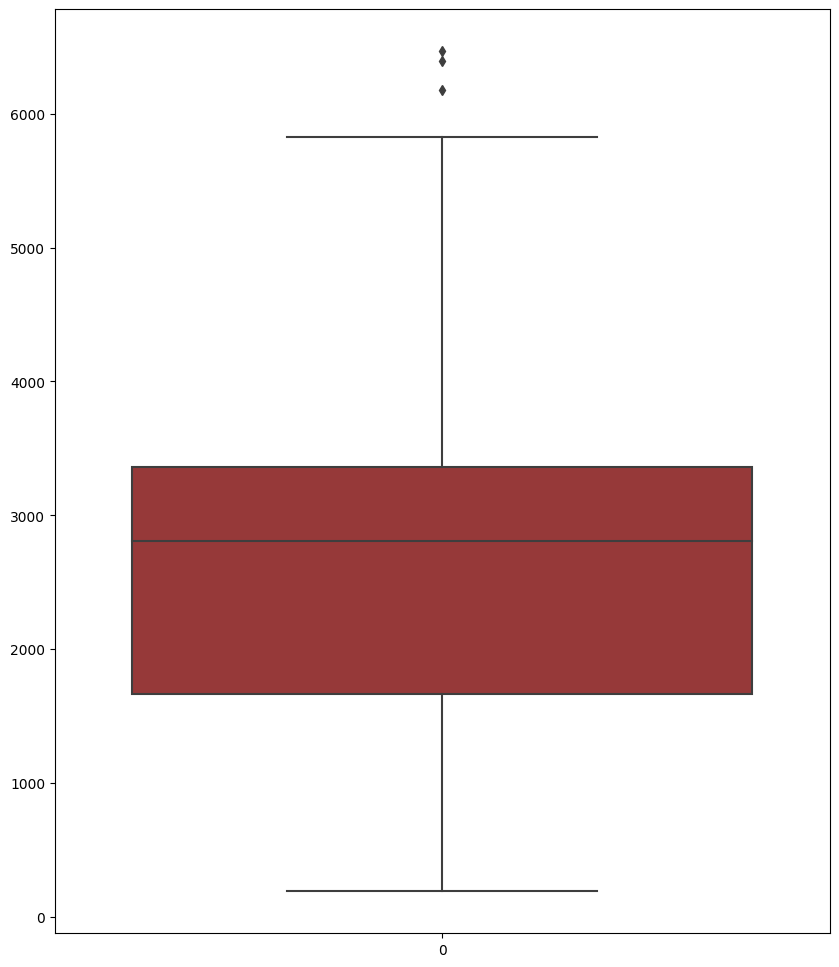

In [ ]:
plt.rcParams['figure.figsize']=(10,12)
sns.boxplot(df['Succeed Deal'], color='brown')

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14216\213284293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Succeed Deal'])


<Axes: xlabel='Succeed Deal', ylabel='Density'>

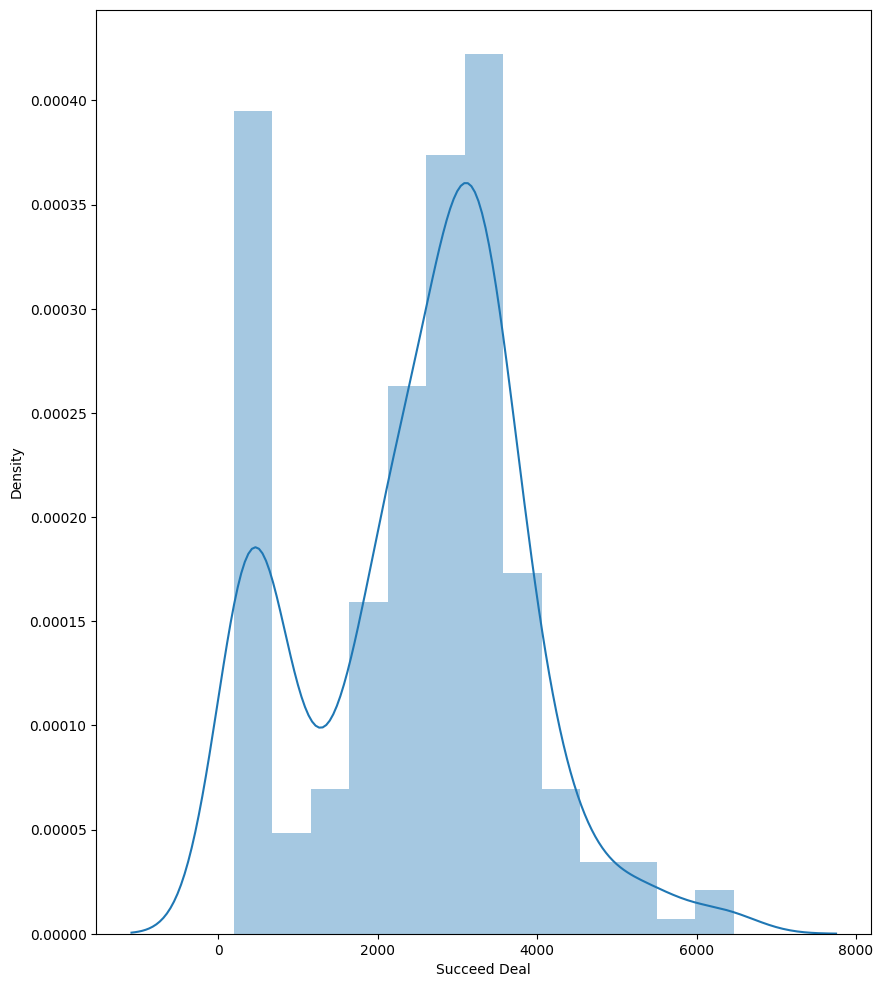

In [ ]:
sns.distplot(df['Succeed Deal'])

((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

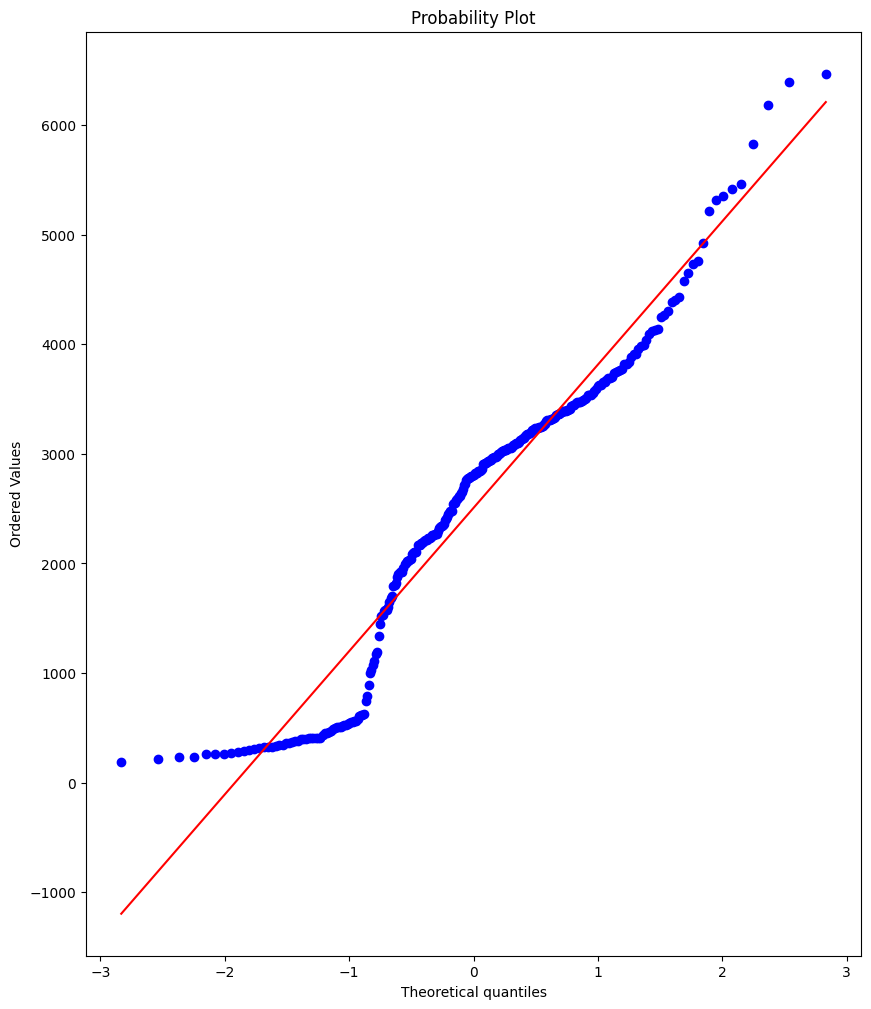

In [ ]:
scipy.stats.probplot(df['Succeed Deal'],plot=pylab)

**Univariate-Prophet**

In [ ]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data',parse_dates=["Date"],index_col=[0])

df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None 
df['Succeed Deal'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_6784\2540969165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None


In [ ]:
features= ['New Account', 'Churned Account', 'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']
target = ['Active Account']

In [ ]:
df['Date'] = df.index

In [ ]:
#Prophet Univariate
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'Active Account']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

"\n#Prophet Univariate\ntrain_size = int(0.7 * len(df))\ntest_size = len(df) - train_size\n\nunivariate_df = df[['Date', 'Active Account']].copy()\nunivariate_df.columns = ['ds', 'y']\n\ntrain = univariate_df.iloc[:train_size, :]\n\nx_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])\nx_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])"

In [ ]:
# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid,  y_pred.tail(test_size)['yhat'])
score_mse = mean_squared_error(y_valid,  y_pred.tail(test_size)['yhat'])
r2 = r2_score(y_valid,  y_pred.tail(test_size)['yhat'])

print(Fore.GREEN + "R-squared: {:.3f}".format(r2))
print('MSE: {:.3f}'.format(score_mse))
print('MAE: {:.3f}'.format(score_mae))'''

'# Train the model\nmodel = Prophet()\nmodel.fit(train)\n\n# x_valid = model.make_future_dataframe(periods=test_size, freq=\'w\')\n\n# Predict on valid set\ny_pred = model.predict(x_valid)\n\n# Calcuate metrics\nscore_mae = mean_absolute_error(y_valid,  y_pred.tail(test_size)[\'yhat\'])\nscore_mse = mean_squared_error(y_valid,  y_pred.tail(test_size)[\'yhat\'])\nr2 = r2_score(y_valid,  y_pred.tail(test_size)[\'yhat\'])\n\nprint(Fore.GREEN + "R-squared: {:.3f}".format(r2))\nprint(\'MSE: {:.3f}\'.format(score_mse))\nprint(\'MAE: {:.3f}\'.format(score_mae))'

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Actual') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, MSE: {score_mse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Active Account', fontsize=14)

plt.show()

"# Plot the forecast\nf, ax = plt.subplots(1)\nf.set_figheight(6)\nf.set_figwidth(15)\n\nmodel.plot(y_pred, ax=ax)\nsns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Actual') \n\nax.set_title(f'Prediction \n MAE: {score_mae:.2f}, MSE: {score_mse:.2f}', fontsize=14)\nax.set_xlabel(xlabel='Date', fontsize=14)\nax.set_ylabel(ylabel='Active Account', fontsize=14)\n\nplt.show()"

In [ ]:
# Remove unnecessarry columns
columns_to_remove = ["Date"]
df = df.drop(columns=columns_to_remove)
df

,Active Account,New Account,Churned Account,Potential Customer,Deal Added,Succeed Deal,Dollar Price
Date,,,,,,,
2022-09-26 17:30:00.000,1521.0,4,4,29,11541,6394.0,31681
2022-09-27 17:30:00.850,1494.0,0,1,16,3176,315.0,32190
2022-09-28 17:30:00.657,1505.0,5,5,29,6132,2019.0,31831
2022-09-29 17:30:00.563,1506.0,2,3,29,5611,2297.0,31848
2022-09-30 17:30:00.900,1465.0,1,1,14,886,259.0,31848
...,...,...,...,...,...,...,...
2023-07-17 17:30:00.940,1898.0,1,4,60,12325,3739.0,48818
2023-07-18 17:30:00.817,1907.0,1,0,71,14859,3171.0,48817
2023-07-19 17:30:00.800,1914.0,2,6,62,12316,3024.0,48470


In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*44)
    print(f' Null Hypothesis: Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Time series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Accepting Null Hypothesis.")
        print(f" => Time series is Non-Stationary.")
     

for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_6784\4128297198.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df.iteritems():


    Augmented Dickey-Fuller Test on "Active Account" 
    --------------------------------------------
 Null Hypothesis: Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3795
 No. Lags Chosen       = 15
 => P-Value = 0.5921. Accepting Null Hypothesis.
 => Time series is Non-Stationary.


    Augmented Dickey-Fuller Test on "New Account" 
    --------------------------------------------
 Null Hypothesis: Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.257
 No. Lags Chosen       = 6
 => P-Value = 0.0169. Rejecting Null Hypothesis.
 => Time series is Stationary.


    Augmented Dickey-Fuller Test on "Churned Account" 
    --------------------------------------------
 Null Hypothesis: Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5222
 No. Lags Chosen       = 7
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Time series is Stationary.


    Augmented Dickey-Fuller Test on "Potential Customer" 
    ---------

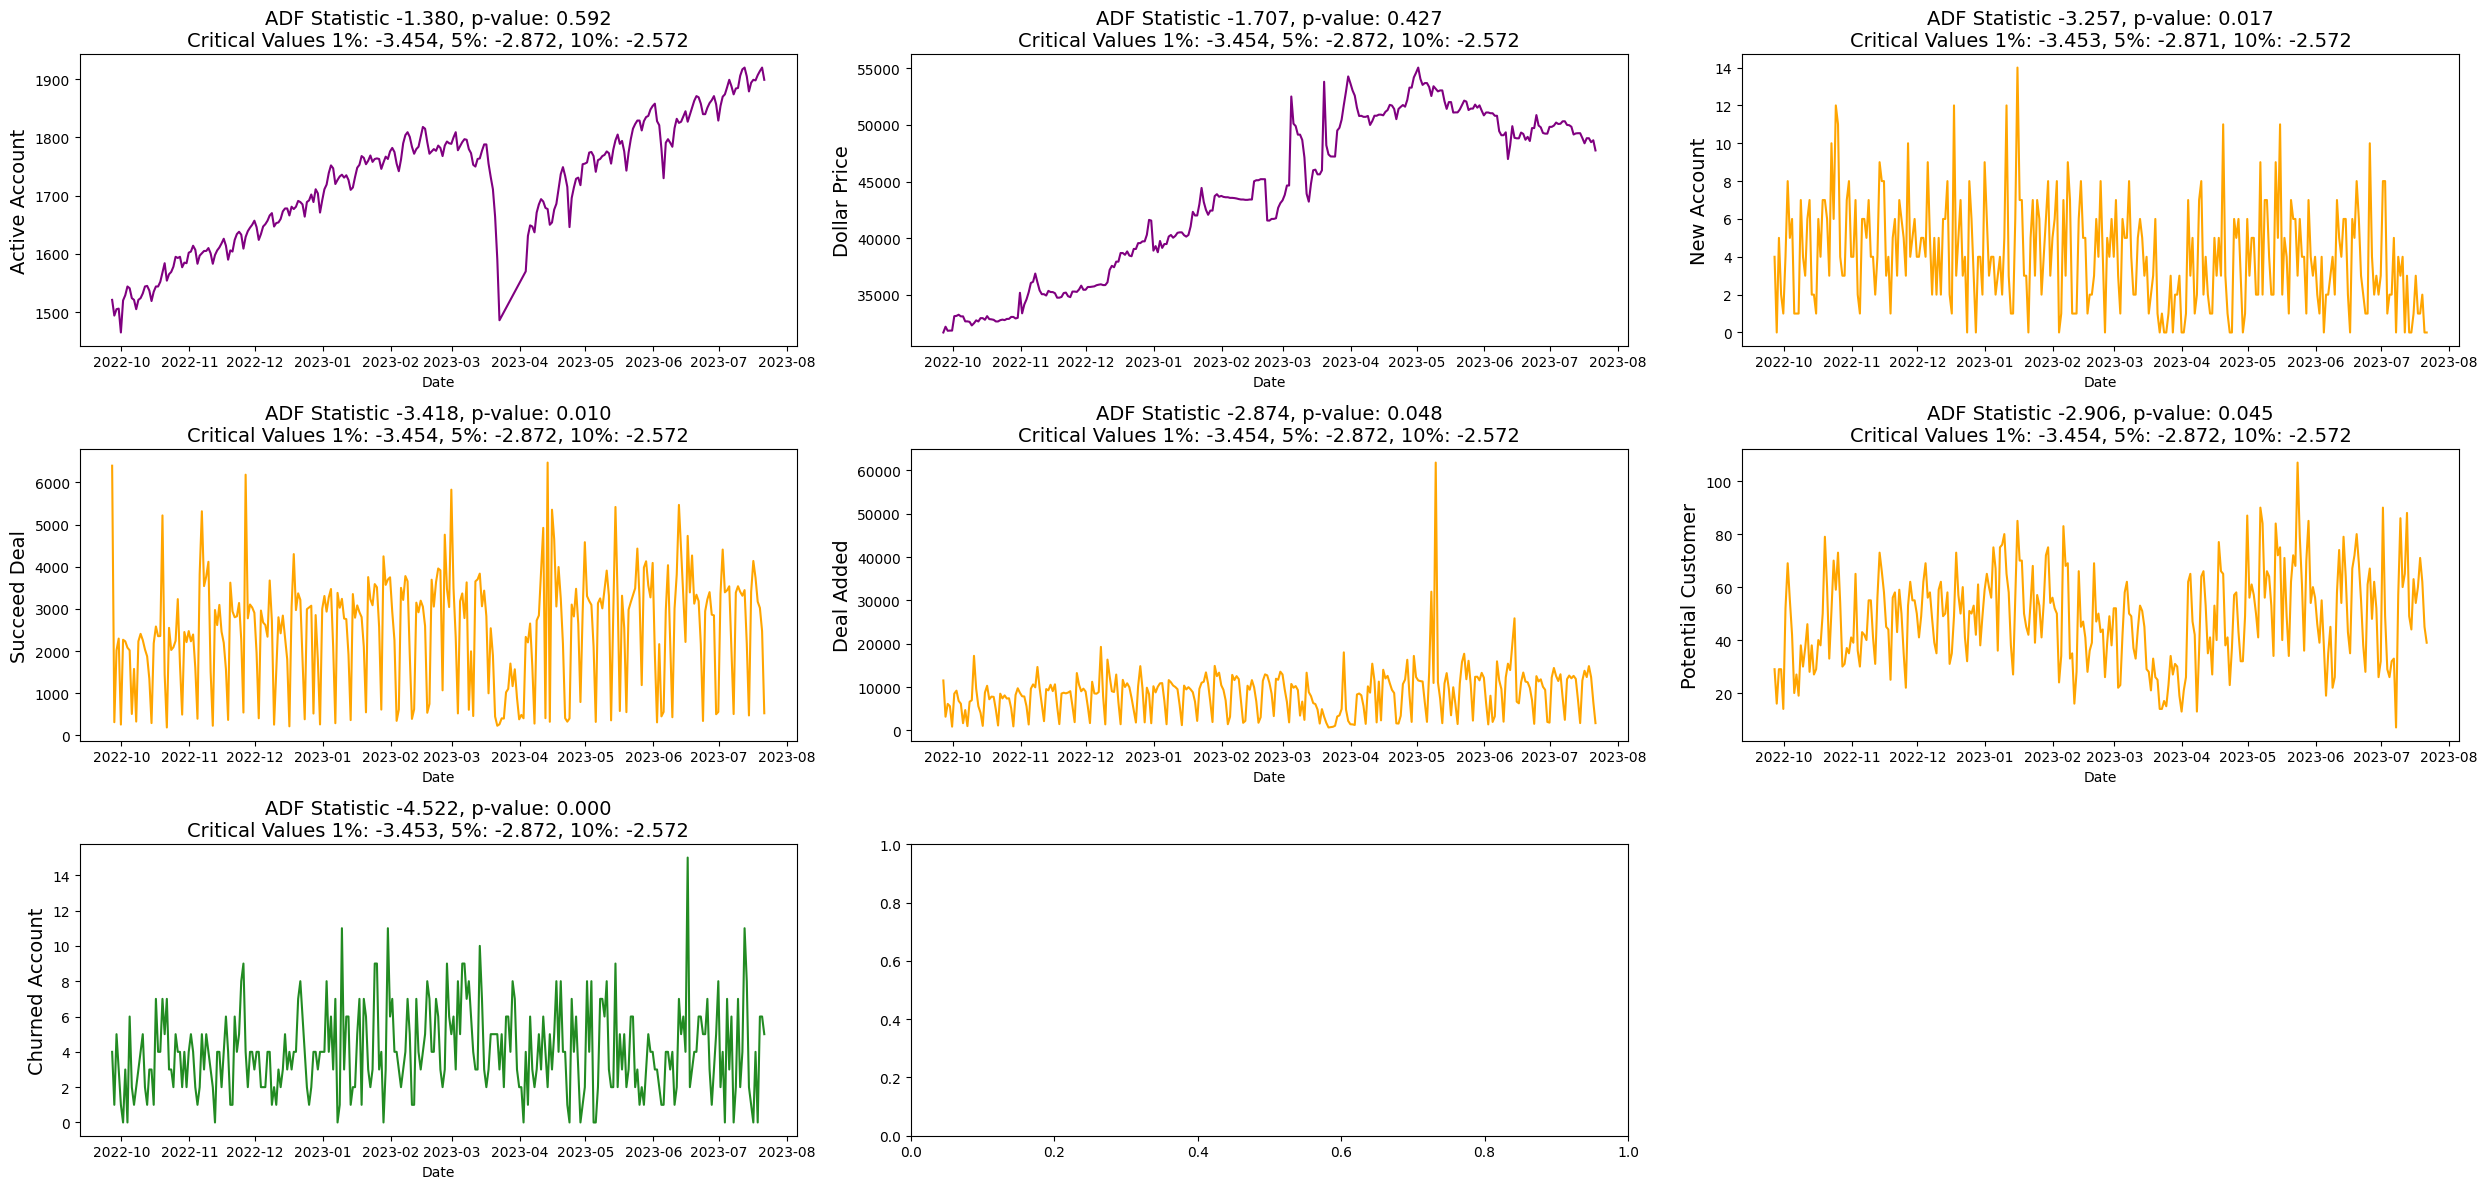

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 12))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['Active Account'].values, 'Active Account', ax[0, 0])
visualize_adfuller_results(df['Dollar Price'].values, 'Dollar Price', ax[0, 1])
visualize_adfuller_results(df['New Account'].values, 'New Account', ax[0, 2])
visualize_adfuller_results(df['Succeed Deal'].values, 'Succeed Deal', ax[1, 0])
visualize_adfuller_results(df['Deal Added'].values, 'Deal Added', ax[1, 1])
visualize_adfuller_results(df['Potential Customer'].values, 'Potential Customer', ax[1, 2])
visualize_adfuller_results(df['Churned Account'].values, 'Churned Account', ax[2, 0])

f.delaxes(ax[2, 2])
plt.tight_layout()
plt.show()

In [ ]:
'''Dollar Price and Active Account are non stationary.'''

'Dollar Price and Active Account are non stationary.'

In [ ]:
'''# square root Transform of absolute values
df['Active Account_sqrt'] = np.sqrt(df["Active Account"])

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Active Account_sqrt'], 'Transformed \n Active Account', ax[0])

sns.distplot(df['Active Account_sqrt'], ax=ax[1])

# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Active Account_log'] = np.log(abs(df["Active Account"]))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Active Account_log'], 'Transformed \n r Active Account', ax[0])

sns.distplot(df['Active Account_log'], ax=ax[1])'''

'# square root Transform of absolute values\ndf[\'Active Account_sqrt\'] = np.sqrt(df["Active Account"])\n\nf, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))\nvisualize_adfuller_results(df[\'Active Account_sqrt\'], \'Transformed \n Active Account\', ax[0])\n\nsns.distplot(df[\'Active Account_sqrt\'], ax=ax[1])\n\n# Log Transform of absolute values\n# (Log transoform of negative values will return NaN)\ndf[\'Active Account_log\'] = np.log(abs(df["Active Account"]))\n\nf, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))\nvisualize_adfuller_results(df[\'Active Account_log\'], \'Transformed \n r Active Account\', ax[0])\n\nsns.distplot(df[\'Active Account_log\'], ax=ax[1])'

In [ ]:
'''# square root Transform of absolute values
df['Dollar Price_sqrt'] = np.sqrt(df["Dollar Price"])

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Dollar Price_sqrt'], 'Transformed \n Dollar Price', ax[0])

sns.distplot(df['Dollar Price_sqrt'], ax=ax[1])

# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Dollar Price_log'] = np.log(abs(df["Dollar Price"]))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['Dollar Price_log'], 'Transformed \n Dollar Price', ax[0])

sns.distplot(df['Dollar Price_log'], ax=ax[1])'''

'# square root Transform of absolute values\ndf[\'Dollar Price_sqrt\'] = np.sqrt(df["Dollar Price"])\n\nf, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))\nvisualize_adfuller_results(df[\'Dollar Price_sqrt\'], \'Transformed \n Dollar Price\', ax[0])\n\nsns.distplot(df[\'Dollar Price_sqrt\'], ax=ax[1])\n\n# Log Transform of absolute values\n# (Log transoform of negative values will return NaN)\ndf[\'Dollar Price_log\'] = np.log(abs(df["Dollar Price"]))\n\nf, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))\nvisualize_adfuller_results(df[\'Dollar Price_log\'], \'Transformed \n Dollar Price\', ax[0])\n\nsns.distplot(df[\'Dollar Price_log\'], ax=ax[1])'

In [ ]:
'''# First Order Differencing
ts_diff = np.diff(df['Dollar Price'])
df['Dollar_Price_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Dollar_Price_diff_1'], 'Differenced (1. Order) \n Dollar Price', ax)'''

"# First Order Differencing\nts_diff = np.diff(df['Dollar Price'])\ndf['Dollar_Price_diff_1'] = np.append([0], ts_diff)\n\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))\nvisualize_adfuller_results(df['Dollar_Price_diff_1'], 'Differenced (1. Order) \n Dollar Price', ax)"

In [ ]:
'''# First Order Differencing
ts_diff = np.diff(df['Active Account'])
df['Active_Account_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['Active_Account_diff_1'], 'Differenced (1. Order) \n Active Account', ax)'''

"# First Order Differencing\nts_diff = np.diff(df['Active Account'])\ndf['Active_Account_diff_1'] = np.append([0], ts_diff)\n\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))\nvisualize_adfuller_results(df['Active_Account_diff_1'], 'Differenced (1. Order) \n Active Account', ax)"

**Univariate-Neural Network**

In [ ]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data')

df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_11800\1299343198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Active Account'].loc[(df['Active Account']<=1390)] = None


In [ ]:
# Remove unnecessarry columns
columns_to_remove = ['New Account', 'Churned Account', 'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']
df = df.drop(columns=columns_to_remove)
df

,Date,Active Account
0,2022-09-26 17:30:00.000,1521.0
1,2022-09-27 17:30:00.850,1494.0
2,2022-09-28 17:30:00.657,1505.0
3,2022-09-29 17:30:00.563,1506.0
4,2022-09-30 17:30:00.900,1465.0
...,...,...
294,2023-07-17 17:30:00.940,1898.0
295,2023-07-18 17:30:00.817,1907.0
296,2023-07-19 17:30:00.800,1914.0
297,2023-07-20 17:30:00.803,1920.0


In [ ]:
#df = pd.read_excel('Book1.xlsx')
df.head()

,Date,Active Account
0,2022-09-26 17:30:00.000,1521.0
1,2022-09-27 17:30:00.850,1494.0
2,2022-09-28 17:30:00.657,1505.0
3,2022-09-29 17:30:00.563,1506.0
4,2022-09-30 17:30:00.900,1465.0


In [ ]:
df.shape

(299, 2)

In [ ]:
df.dtypes

Date              datetime64[ns]
Active Account           float64
dtype: object

In [ ]:
df.isnull().sum()

Date              0
Active Account    0
dtype: int64

In [ ]:
# Use MinMaxScaler for scaling values between 0 and 1

scaler1 = MinMaxScaler()
df['Active Account'] = scaler1.fit_transform(df[['Active Account']])


In [ ]:
time = df['Date']
series = df['Active Account']


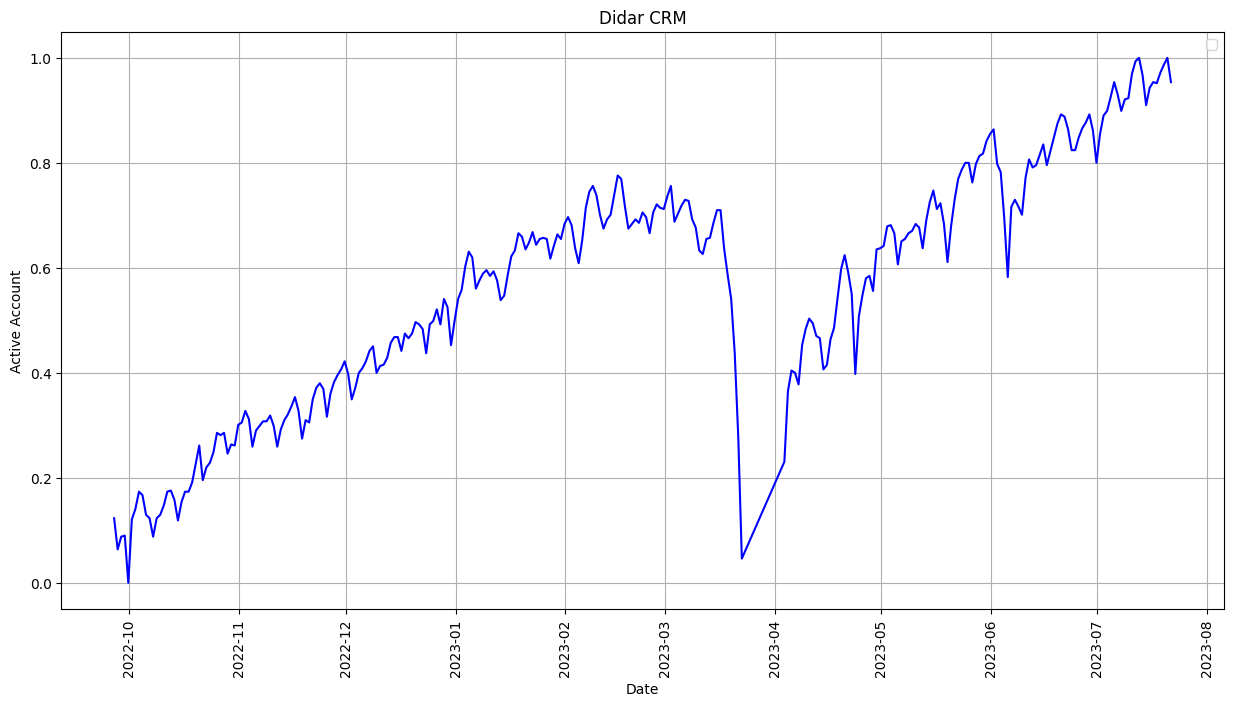

In [ ]:
plt.figure(figsize=[15, 7.5])
# Plotting the 'Active Account' column
plt.plot(df['Date'], df['Active Account'], color='blue')

plt.title('Didar CRM')
plt.ylabel('Active Account')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
test_split=round(len(df)*0.30)
test_split

90

In [ ]:
# Define the split time
split_time = len(df) - test_split

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

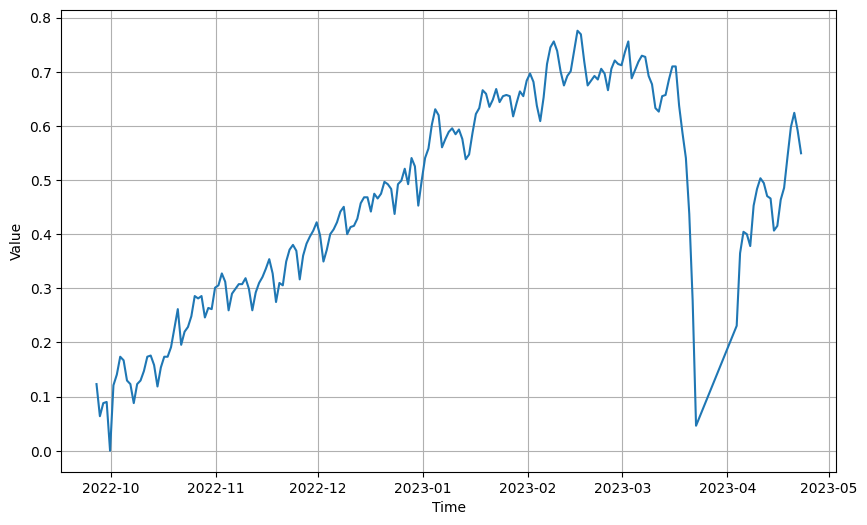

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

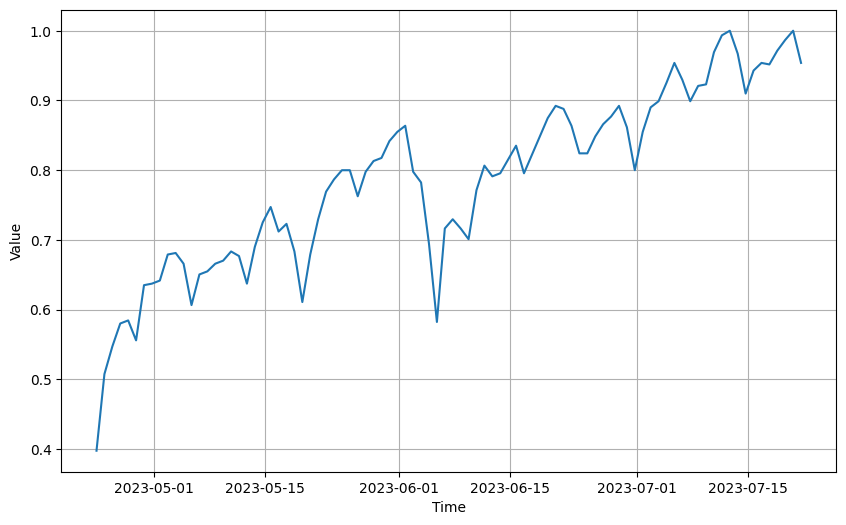

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [ ]:
window_size = 9
batch_size = 30
shuffle_buffer_size=100 


def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

    
dataset=windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)



In [ ]:
'''
tf.random.set_seed(11) 

model_baseline=tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_baseline.compile(loss=tf.keras.losses.Huber(), optimizer=tf.optimizers.Adam(learning_rate=0.001))
'''


'\ntf.random.set_seed(11) \n\nmodel_baseline=tf.keras.models.Sequential([\n    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),\n    #tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(1)\n])\n\nmodel_baseline.compile(loss=tf.keras.losses.Huber(), optimizer=tf.optimizers.Adam(learning_rate=0.001))\n'

In [ ]:
tf.random.set_seed(11) 

model_baseline=tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1), input_shape=[None]),
    tf.keras.layers.Conv1D(filters=30, kernel_size=3, strides=1, activation='relu', padding='causal'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model_baseline.compile(loss=tf.keras.losses.Huber(), optimizer=tf.optimizers.Adam(learning_rate=0.001))



In [ ]:
tf.random.set_seed(11) 

history=model_baseline.fit(dataset, epochs=200)


Epoch 1/200


7/7 [==============================] - 22s 59ms/step - loss: 0.0640
Epoch 2/200
7/7 [==============================] - 0s 51ms/step - loss: 0.0144
Epoch 3/200
7/7 [==============================] - 0s 43ms/step - loss: 0.0087
Epoch 4/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0086
Epoch 5/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0079
Epoch 6/200
7/7 [==============================] - 0s 32ms/step - loss: 0.0060
Epoch 7/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0052
Epoch 8/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0053
Epoch 9/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0050
Epoch 10/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0047
Epoch 11/200
7/7 [==============================] - 0s 50ms/step - loss: 0.0051
Epoch 12/200
7/7 [==============================] - 0s 50ms/step - loss: 0.0048
Epoch 13/200
7/7 [==============================] - 0s 59ms/

In [ ]:
forecast_series=np.array(series[split_time-window_size:])
forecast=[]

for time in range(len(forecast_series)-window_size):
   forecast.append(model_baseline.predict(forecast_series[time:time+window_size][np.newaxis]))


1/1 [==============================] - 0s 42ms/step


In [ ]:
results=np.array(forecast).squeeze()

In [ ]:
x_valid = scaler1.inverse_transform(np.array(x_valid).reshape(-1, 1))
results = scaler1.inverse_transform(results.reshape(-1 ,1))

In [ ]:
# Compute the metrics

mse = tf.keras.metrics.mean_squared_error(x_valid, results).numpy()
mae = tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

mean_mse = np.mean(mse)
mean_mae = np.mean(mae)

print("Mean MSE:", mean_mse)
print("Mean MAE:", mean_mae)
r2 = r2_score(x_valid, results)
print("R-squared: {:.2f}".format(r2))

Mean MSE: 638.6692
Mean MAE: 19.12524
R-squared: 0.81


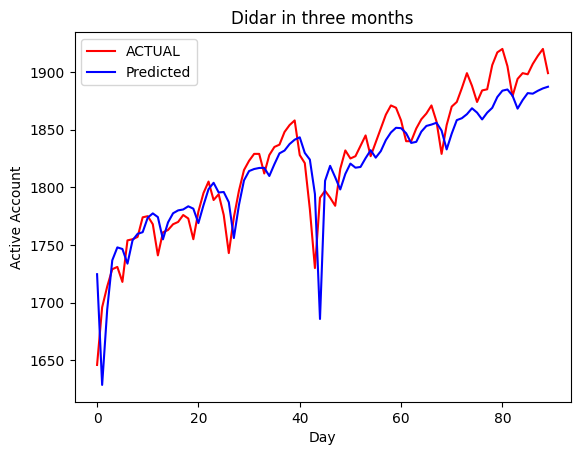

In [ ]:
plt.plot(x_valid, color = 'red', label = 'ACTUAL')
plt.plot(results, color = 'blue', label = 'Predicted')
plt.title('Didar in three months')
plt.xlabel('Day')
plt.ylabel('Active Account')
plt.legend()
plt.show()

**MultiVariate-Prophet---Bayesian Optimization**

In [ ]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data',parse_dates=["Date"],index_col=[0])

df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None 
df['Succeed Deal'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_6784\2540969165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None


In [ ]:
features= ['New Account', 'Churned Account', 'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']
target = ['Active Account']

In [ ]:
df['Date'] = df.index

In [ ]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

multivariate_df = df[['Date'] + target + features].copy()
multivariate_df.columns = ['ds', 'y'] + features

train = multivariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6,7]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6,7]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,New Account,Churned Account,Potential Customer,Deal Added,Succeed Deal,Dollar Price
Date,,,,,,,,
2022-09-26 17:30:00.000,2022-09-26 17:30:00.000,1521.0,4,4,29,11541,6394.0,31681
2022-09-27 17:30:00.850,2022-09-27 17:30:00.850,1494.0,0,1,16,3176,315.0,32190
2022-09-28 17:30:00.657,2022-09-28 17:30:00.657,1505.0,5,5,29,6132,2019.0,31831
2022-09-29 17:30:00.563,2022-09-29 17:30:00.563,1506.0,2,3,29,5611,2297.0,31848
2022-09-30 17:30:00.900,2022-09-30 17:30:00.900,1465.0,1,1,14,886,259.0,31848


In [ ]:
def prophet_f(weekly_seasonality, period, fourier_order, 
prior_scale1, prior_scale2, prior_scale3, prior_scale4, prior_scale5, prior_scale6, 
mode1, mode2, mode3, mode4, mode5, mode6):

    mode_mapping = {
        0: 'multiplicative',
        1: 'additive'
    }

    mode1 = mode_mapping[round(mode1)]
    mode2 = mode_mapping[round(mode2)]
    mode3 = mode_mapping[round(mode3)]
    mode4 = mode_mapping[round(mode4)]
    mode5 = mode_mapping[round(mode5)]
    mode6 = mode_mapping[round(mode6)]

    model = Prophet(growth='linear',seasonality_mode='multiplicative', weekly_seasonality=weekly_seasonality, interval_width=0.9)
    model.add_seasonality(name='monthly', period=period, fourier_order=int(fourier_order))
    model.add_regressor('New Account',standardize=False, mode= mode1, prior_scale = prior_scale1) 
    model.add_regressor('Churned Account',standardize=False, mode= mode2, prior_scale = prior_scale2)
    model.add_regressor('Potential Customer',standardize=True, mode=mode3, prior_scale = prior_scale3)
    model.add_regressor('Deal Added',standardize=True, mode=mode4, prior_scale = prior_scale4)
    model.add_regressor('Succeed Deal',standardize=False, mode=mode5, prior_scale = prior_scale5)
    model.add_regressor('Dollar Price',standardize=False, mode=mode6, prior_scale = prior_scale6)            

  
    # Fit the model with train set
    model.fit(train)

    # Predict on valid set
    y_pred = model.predict(x_valid)

    score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
    return -score_mae
    

In [ ]:
'''# Define an encoding dictionary for categorical parameters
mode_encoding = {
    0: 'multiplicative',
    1: 'additive'
}

pbounds = {
    'weekly_seasonality': (1, 40),
    'period': (20, 40),
    'fourier_order': (1, 30), 
    'prior_scale1': (0.001, 100),
    'prior_scale2': (0.001, 100),
    'prior_scale3': (0.001, 100),
    'prior_scale4': (0.001, 100),
    'prior_scale5': (0.001, 100),
    'prior_scale6': (0.001, 100),
    'mode1': (0, 1),  
    'mode2': (0, 1),
    'mode3': (0, 1),
    'mode4': (0, 1),
    'mode5': (0, 1),
    'mode6': (0, 1)
}

optimizer = BayesianOptimization(
    f = prophet_f,
    pbounds = pbounds,
    verbose = 2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state = 42
)

optimizer.maximize(
    init_points = 50,
    n_iter = 100)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_mae = -optimizer.max['target']

print("Best Hyperparameters:", best_params)
print("Best MAE:", best_mae)'''

'# Define an encoding dictionary for categorical parameters\nmode_encoding = {\n    0: \'multiplicative\',\n    1: \'additive\'\n}\n\npbounds = {\n    \'weekly_seasonality\': (1, 40),\n    \'period\': (20, 40),\n    \'fourier_order\': (1, 30), \n    \'prior_scale1\': (0.001, 100),\n    \'prior_scale2\': (0.001, 100),\n    \'prior_scale3\': (0.001, 100),\n    \'prior_scale4\': (0.001, 100),\n    \'prior_scale5\': (0.001, 100),\n    \'prior_scale6\': (0.001, 100),\n    \'mode1\': (0, 1),  \n    \'mode2\': (0, 1),\n    \'mode3\': (0, 1),\n    \'mode4\': (0, 1),\n    \'mode5\': (0, 1),\n    \'mode6\': (0, 1)\n}\n\noptimizer = BayesianOptimization(\n    f = prophet_f,\n    pbounds = pbounds,\n    verbose = 2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent\n    random_state = 42\n)\n\noptimizer.maximize(\n    init_points = 50,\n    n_iter = 100)\n\n# Get the best hyperparameters\nbest_params = optimizer.max[\'params\']\nbest_mae = -optimizer.max[\'target\']\n\np

In [ ]:
'''Best Hyperparameters: {'fourier_order': 1.0, 
'mode1': 1.0, 
'mode2': 1.0, 
'mode3': 1.0, 
'mode4': 0.0, 
'mode5': 0.0, 
'mode6': 0.0, 
'period': 40.0, 
'prior_scale1': 81.66184781033603, 
'prior_scale2': 35.9409849592622, 
'prior_scale3': 45.7619299832996, 
'prior_scale4': 98.49417151330404, 
'prior_scale5': 100.0, 
'prior_scale6': 0.001, 
'standardize1': 0.0, 
'standardize2': 0.0, 
'standardize3': 0.7714134433923571, 
'standardize4': 0.7430928550717263, 
'standardize5': 0.2987977692310089, 
'standardize6': 0.0, 
'weekly_seasonality': 4.808750774131193}
Best MAE: 30.89230344388152'''

"Best Hyperparameters: {'fourier_order': 1.0, \n'mode1': 1.0, \n'mode2': 1.0, \n'mode3': 1.0, \n'mode4': 0.0, \n'mode5': 0.0, \n'mode6': 0.0, \n'period': 40.0, \n'prior_scale1': 81.66184781033603, \n'prior_scale2': 35.9409849592622, \n'prior_scale3': 45.7619299832996, \n'prior_scale4': 98.49417151330404, \n'prior_scale5': 100.0, \n'prior_scale6': 0.001, \n'standardize1': 0.0, \n'standardize2': 0.0, \n'standardize3': 0.7714134433923571, \n'standardize4': 0.7430928550717263, \n'standardize5': 0.2987977692310089, \n'standardize6': 0.0, \n'weekly_seasonality': 4.808750774131193}\nBest MAE: 30.89230344388152"

In [ ]:
'''Best Hyperparameters: {'fourier_order': 28.211873247810097, 'mode1': 0.18123306616566015, 'mode2': 0.0664962673667775, 'mode3': 0.741120649290059, 'mode4': 0.5744731131799119, 'mode5': 0.8418287767582721, 'mode6': 0.1397723766262895, 'period': 35.905346237197804, 'prior_scale1': 20.163530377454407, 'prior_scale2': 16.366430630627587, 'prior_scale3': 16.427415527301363, 'prior_scale4': 81.45765744841798, 'prior_scale5': 66.52005687239932, 'prior_scale6': 52.30701941148716, 'weekly_seasonality': 14.994388880816597}
Best MAE: 93.5508626811584'''

"Best Hyperparameters: {'fourier_order': 28.211873247810097, 'mode1': 0.18123306616566015, 'mode2': 0.0664962673667775, 'mode3': 0.741120649290059, 'mode4': 0.5744731131799119, 'mode5': 0.8418287767582721, 'mode6': 0.1397723766262895, 'period': 35.905346237197804, 'prior_scale1': 20.163530377454407, 'prior_scale2': 16.366430630627587, 'prior_scale3': 16.427415527301363, 'prior_scale4': 81.45765744841798, 'prior_scale5': 66.52005687239932, 'prior_scale6': 52.30701941148716, 'weekly_seasonality': 14.994388880816597}\nBest MAE: 93.5508626811584"

In [ ]:
model = Prophet(growth='linear',seasonality_mode='multiplicative', weekly_seasonality=14.994388880816597, interval_width=0.9)
model.add_seasonality(name='monthly', period=35.905346237197804, fourier_order=28)
model.add_regressor('New Account',standardize=0, mode='multiplicative', prior_scale =20.163530377454407) 
model.add_regressor('Churned Account',standardize=0, mode='multiplicative', prior_scale = 16.366430630627587)
model.add_regressor('Potential Customer',standardize=1, mode='additive', prior_scale = 16.427415527301363)
model.add_regressor('Deal Added',standardize=1, mode='additive', prior_scale = 81.45765744841798)
model.add_regressor('Succeed Deal',standardize=0, mode='additive', prior_scale = 66.52005687239932)
model.add_regressor('Dollar Price',standardize=0, mode='multiplicative', prior_scale = 52.30701941148716)     


# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

15:50:57 - cmdstanpy - INFO - Chain [1] start processing
15:50:57 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_mse = mean_squared_error(y_valid, y_pred.tail(test_size)['yhat'])
r2 = r2_score(y_valid, y_pred.tail(test_size)['yhat'])
n = len(x_valid)
p = 6   # number of independent variables
r2_adj = 1 - (1 - r2) * (n - 1)/(n - p - 1)

print(Fore.GREEN + "R-squared: {:.3f}".format(r2))
print("Adjusted R-squared: {:.3f}".format(r2_adj))
print('MSE: {:.3f}'.format(score_mse))
print('MAE: {:.3f}'.format(score_mae))

R-squared: -3.182
Adjusted R-squared: -3.484
MSE: 14036.953
MAE: 93.551


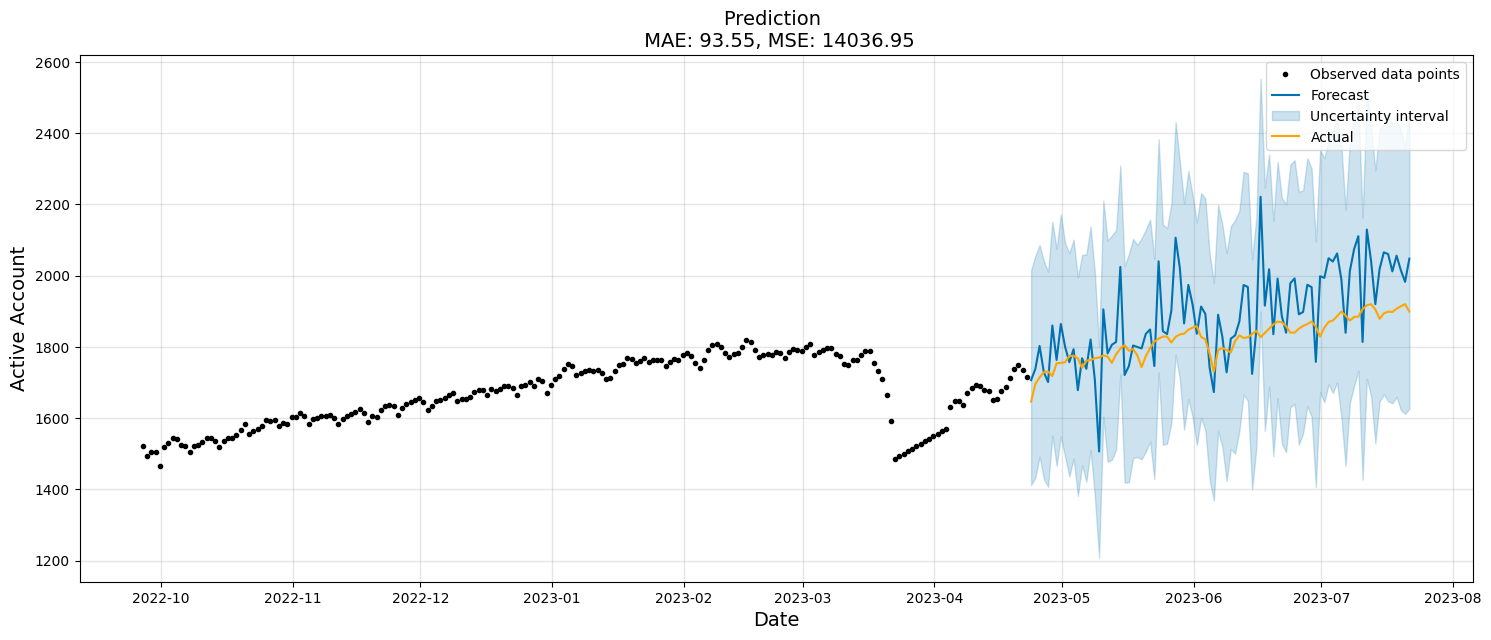

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Actual') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, MSE: {score_mse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Active Account', fontsize=14)

plt.show()

**MultiVariate-Neural Network---Bayesian Optimization**

In [ ]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data',parse_dates=["Date"],index_col=[0])

df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None 
df['Succeed Deal'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_27876\2540969165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None


In [ ]:
df.describe()

,Active Account,New Account,Churned Account,Potential Customer,Deal Added,Succeed Deal,Dollar Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1714.876254,4.056856,4.023411,48.474916,8605.187291,2506.463211,43805.401338
std,109.610941,2.713398,2.404439,17.630297,5552.963643,1335.357371,7039.078164
min,1465.000000,0.000000,0.000000,7.000000,693.000000,190.000000,31681.000000
25%,1632.000000,2.000000,2.000000,35.000000,5347.500000,1663.000000,36515.000000
50%,1736.000000,4.000000,4.000000,49.000000,9050.000000,2806.000000,43815.000000
75%,1790.500000,6.000000,5.500000,60.000000,11480.000000,3358.500000,50313.000000
max,1920.000000,14.000000,15.000000,107.000000,61818.000000,6468.000000,55051.000000


C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_27876\3318246467.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelrf.fit(predictors, Target)


'#Final Features from Random Forest (Select Features with highest feature importance)\nrf_top_features = pd.DataFrame(feat_importances.nlargest(4)).axes[0].tolist()\n\n#2.Select the top n features based on absolute correlation with target variable\ncorr_data1 = pd.concat([Target,predictors],axis = 1)\ncorr_data = corr_data1.corr()\ncorr_data = corr_data.iloc[: , [0]]\ncorr_data.columns.values[0] = "Correlation"\ncorr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()] \ncorr_data = corr_data[corr_data[\'Correlation\'].notna()]\ncorr_data = corr_data.loc[corr_data[\'Correlation\'] != 1]\ncorr_data\n# Select Features with greater than 90% absolute correlation\ncorr_data2 = corr_data.loc[corr_data[\'Correlation\'].abs() > .2]\ncorr_top_features = corr_data2.axes[0].tolist()'

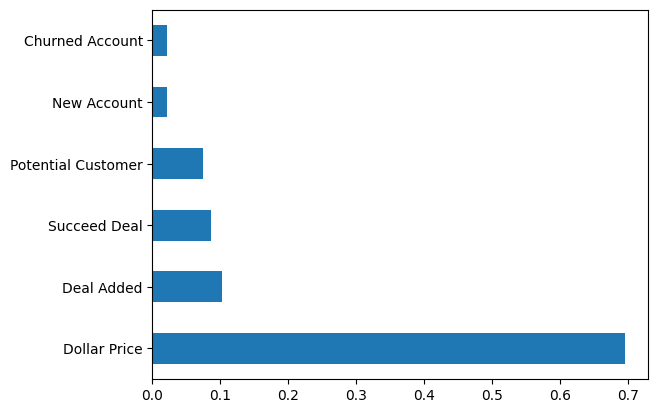

In [ ]:
predictors = df[['New Account', 'Churned Account', 'Potential Customer', 'Deal Added', 'Succeed Deal', 'Dollar Price']] # +'Active Account',
Target = df[['Active Account']]

#1.Select the top n features based on feature importance from random forest

np.random.seed(10)

# define the model
modelrf = RandomForestRegressor(random_state = random.seed(10))
# fit the model
modelrf.fit(predictors, Target)

# get importance
features = predictors
importances = modelrf.feature_importances_
indices = np.argsort(importances)

feat_importances = pd.Series(modelrf.feature_importances_, index=predictors.columns)
feat_importances.nlargest(30).plot(kind='barh')

'''#Final Features from Random Forest (Select Features with highest feature importance)
rf_top_features = pd.DataFrame(feat_importances.nlargest(4)).axes[0].tolist()

#2.Select the top n features based on absolute correlation with target variable
corr_data1 = pd.concat([Target,predictors],axis = 1)
corr_data = corr_data1.corr()
corr_data = corr_data.iloc[: , [0]]
corr_data.columns.values[0] = "Correlation"
corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()] 
corr_data = corr_data[corr_data['Correlation'].notna()]
corr_data = corr_data.loc[corr_data['Correlation'] != 1]
corr_data
# Select Features with greater than 90% absolute correlation
corr_data2 = corr_data.loc[corr_data['Correlation'].abs() > .2]
corr_top_features = corr_data2.axes[0].tolist()'''

In [ ]:
train_size = int(len(df) * .7)
test_size = len(df) - train_size

print(train_size, test_size)

209 90


In [ ]:
df_for_training = df.iloc[0:train_size]
df_for_testing = df.iloc[train_size:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
def createXY(dataset,seq):
    dataX = []
    dataY = []
    for i in range(seq, len(dataset)):
            dataX.append(dataset[i - seq:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)  

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=70, kernel_size=7, strides=1, activation='relu', padding='causal', input_shape=(1, 7)))
    model.add(LSTM(210, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.01))
    model.add(Dense(14))
    model.add(Dense(1))

    model.compile(loss=tf.keras.losses.Huber(), optimizer=Adam(learning_rate=0.00075))
    return model

# Set the hyperparameters manually
epochs = 200
batch_size = 44  
optimizer = 'adam'


In [ ]:
# Build and compile the model
best_model = build_model()

# Train the model
history = best_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(testX, testY))

Epoch 1/200
5/5 [==============================] - 35s 870ms/step - loss: 0.1909 - val_loss: 0.4718
Epoch 2/200
5/5 [==============================] - 0s 100ms/step - loss: 0.1607 - val_loss: 0.4015
Epoch 3/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1205 - val_loss: 0.2908
Epoch 4/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0684 - val_loss: 0.1268
Epoch 5/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0257 - val_loss: 0.0172
Epoch 6/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0349 - val_loss: 0.0230
Epoch 7/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0224 - val_loss: 0.0733
Epoch 8/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0234 - val_loss: 0.0876
Epoch 9/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0229 - val_loss: 0.0621
Epoch 10/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0185 - val_loss: 0.0340
Epoch 11/200
5/5

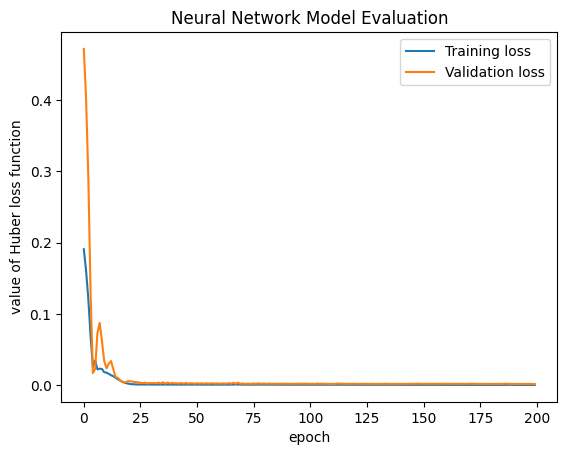

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Neural Network Model Evaluation')
plt.xlabel('epoch')
plt.ylabel('value of Huber loss function')
plt.legend()
plt.show()

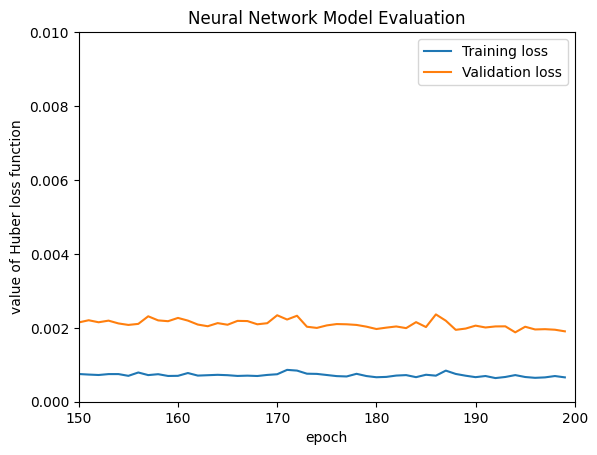

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Neural Network Model Evaluation')
plt.xlabel('epoch')
plt.ylabel('value of Huber loss function')
plt.legend()
# zoom in
plt.xlim((epochs-50), epochs)  
plt.ylim(0, 0.01)  

plt.show()

In [ ]:
# Make predictions
prediction = best_model.predict(testX)

prediction_copies_array = np.repeat(prediction,7, axis=-1)

pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),7)))[:,0]

original_copies_array = np.repeat(testY,7, axis=-1)

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),7)))[:,0]

3/3 [==============================] - 2s 9ms/step


In [ ]:
results = pred
validation = original

# Calculate MSE and MAE
mse = mean_squared_error(validation, results)
mae = mean_absolute_error(validation, results)
r2 = r2_score(validation, results)
n = len(validation)
p = 6   # number of independent variables
r2_adj = 1 - (1 - r2) * (n - 1)/(n - p - 1)

print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Adjusted R-squared: {:.2f}".format(r2_adj))

MSE: 474.65
MAE: 16.49
R-squared: 0.84
Adjusted R-squared: 0.83


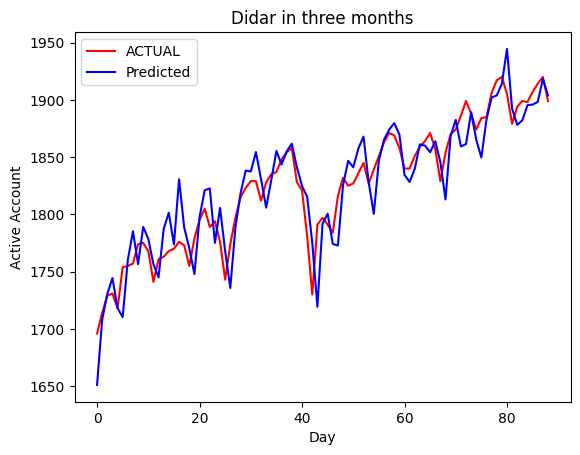

In [ ]:
plt.plot(original, color = 'red', label = 'ACTUAL')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.title('Didar in three months')
plt.xlabel('Day')
plt.ylabel('Active Account')
plt.legend()
plt.show()

In [ ]:
# Make predictions on train data
prediction = best_model.predict(trainX)

prediction_copies_array = np.repeat(prediction,7, axis=-1)

pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),7)))[:,0]

original_copies_array = np.repeat(trainY,7, axis=-1)

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(trainY),7)))[:,0]

results = pred
validation = original

# Calculate MSE and MAE
mse = mean_squared_error(validation, results)
mae = mean_absolute_error(validation, results)
r2 = r2_score(validation, results)
n = len(validation)
p = 6   # number of independent variables
r2_adj = 1 - (1 - r2) * (n - 1)/(n - p - 1)

print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Adjusted R-squared: {:.2f}".format(r2_adj))

7/7 [==============================] - 0s 12ms/step
MSE: 174.89
MAE: 9.26
R-squared: 0.98
Adjusted R-squared: 0.98


In [ ]:
'''
def build_model(batch_size, learning_rate):
    model = Sequential()
    model.add(Conv1D(filters=70, kernel_size=7, strides=1, activation='relu', padding='causal', input_shape=(1, 7)))
    model.add(LSTM(210, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.01))
    model.add(Dense(14))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
    return model


 #'n_filters': (0, 128),
    #'n_unit3': (0, 100),                 
    #'n_unit4': (0, 64),

# Define the search space for Bayesian Optimization
pbounds = {
   'learning_rate': (0.00001, 0.01),
    'batch_size': (1, 120)
}

# Define the objective function
def objective_function(batch_size, learning_rate):
    model = build_model(int(batch_size), learning_rate)
    model.fit(trainX, trainY, epochs=200, batch_size=int(batch_size), verbose=0)
    
    prediction = model.predict(testX)
    prediction_copies_array = np.repeat(prediction, 7, axis=-1)
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(prediction), 7)))[:, 0]
    
    original_copies_array = np.repeat(testY, 7, axis=-1)
    original = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), 7)))[:, 0]

    results = pred
    validation = original

    mae = mean_absolute_error(validation, results)
    return -mae  

# Perform Bayesian Optimization
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=7)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_mae = -optimizer.max['target']

print("Best Hyperparameters:", best_params)
print("Best MAE:", best_mae)
'''

'\ndef build_model(batch_size, learning_rate):\n    model = Sequential()\n    model.add(Conv1D(filters=70, kernel_size=7, strides=1, activation=\'relu\', padding=\'causal\', input_shape=(1, 7)))\n    model.add(LSTM(210, return_sequences=True))\n    model.add(LSTM(128, return_sequences=True))\n    model.add(LSTM(64))\n    model.add(Dropout(0.01))\n    model.add(Dense(14))\n    model.add(Dense(1))\n\n    optimizer = Adam(learning_rate=learning_rate)\n    model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)\n    return model\n\n\n #\'n_filters\': (0, 128),\n    #\'n_unit3\': (0, 100),                 \n    #\'n_unit4\': (0, 64),\n\n# Define the search space for Bayesian Optimization\npbounds = {\n   \'learning_rate\': (0.00001, 0.01),\n    \'batch_size\': (1, 120)\n}\n\n# Define the objective function\ndef objective_function(batch_size, learning_rate):\n    model = build_model(int(batch_size), learning_rate)\n    model.fit(trainX, trainY, epochs=200, batch_size=int(batch_size)

In [ ]:
'''# Convert the values from best_params to integers
best_params_int = {key: int(value) for key, value in best_params.items()}

# Build and compile the best model
best_model = build_model(**best_params_int)

# Train the best model
best_model.fit(trainX, trainY, epochs=best_params_int['epochs'], batch_size=best_params_int['batch_size'], verbose=1)'''

"# Convert the values from best_params to integers\nbest_params_int = {key: int(value) for key, value in best_params.items()}\n\n# Build and compile the best model\nbest_model = build_model(**best_params_int)\n\n# Train the best model\nbest_model.fit(trainX, trainY, epochs=best_params_int['epochs'], batch_size=best_params_int['batch_size'], verbose=1)"

**Next 3 Months Didar CRM Active Accounts Using Whole Data with Best Model to Predict**

In [2]:
df = pd.read_excel("Alireza.xlsx", sheet_name='Merged Data',parse_dates=["Date"],index_col=[0])

df['Active Account'].loc[(df['Active Account']<=1390)] = None 
df['Active Account'].interpolate(method='linear', inplace=True)

df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None 
df['Succeed Deal'].interpolate(method='linear', inplace=True)

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14444\2540969165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Succeed Deal'].loc[(df['Succeed Deal']>=6469)] = None


In [3]:
df

,Active Account,New Account,Churned Account,Potential Customer,Deal Added,Succeed Deal,Dollar Price
Date,,,,,,,
2022-09-26 17:30:00.000,1521.0,4,4,29,11541,6394.0,31681
2022-09-27 17:30:00.850,1494.0,0,1,16,3176,315.0,32190
2022-09-28 17:30:00.657,1505.0,5,5,29,6132,2019.0,31831
2022-09-29 17:30:00.563,1506.0,2,3,29,5611,2297.0,31848
2022-09-30 17:30:00.900,1465.0,1,1,14,886,259.0,31848
...,...,...,...,...,...,...,...
2023-07-17 17:30:00.940,1898.0,1,4,60,12325,3739.0,48818
2023-07-18 17:30:00.817,1907.0,1,0,71,14859,3171.0,48817
2023-07-19 17:30:00.800,1914.0,2,6,62,12316,3024.0,48470


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))


def createXY(dataset,seq):
    dataX = []
    dataY = []
    for i in range(seq, len(dataset)):
            dataX.append(dataset[i - seq:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)  


def build_model():
    model = Sequential()
    model.add(Conv1D(filters=70, kernel_size=7, strides=1, activation='relu', padding='causal', input_shape=(1, 7)))
    model.add(LSTM(210, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.01))
    model.add(Dense(14))
    model.add(Dense(1))

    model.compile(loss=tf.keras.losses.Huber(), optimizer=Adam(learning_rate=0.00075))
    return model

# Set the hyperparameters manually
epochs = 200
batch_size = 44  

In [5]:
# Use entire dataset for training
df_train = df.copy() 

# Scale the data
df_train_scaled = scaler.fit_transform(df_train)

In [6]:
pd.DataFrame(df_train_scaled)

,0,1,2,3,4,5,6
0,0.123077,0.285714,0.266667,0.22,0.177472,0.988213,0.000000
1,0.063736,0.000000,0.066667,0.09,0.040622,0.019911,0.021780
2,0.087912,0.357143,0.333333,0.22,0.088982,0.291335,0.006418
3,0.090110,0.142857,0.200000,0.22,0.080458,0.335616,0.007146
4,0.000000,0.071429,0.066667,0.07,0.003157,0.010991,0.007146
...,...,...,...,...,...,...,...
294,0.951648,0.071429,0.266667,0.53,0.190299,0.565307,0.733291
295,0.971429,0.071429,0.000000,0.64,0.231755,0.474833,0.733248
296,0.986813,0.142857,0.400000,0.55,0.190151,0.451418,0.718400
297,1.000000,0.000000,0.400000,0.38,0.097047,0.363810,0.725546


In [7]:
# Create X and y 
trainX, trainY = createXY(df_train_scaled, 1)

# Build and train model on full dataset
model = build_model()
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size)

Epoch 1/200
7/7 [==============================] - 23s 26ms/step - loss: 0.1645
Epoch 2/200
7/7 [==============================] - 0s 28ms/step - loss: 0.1193
Epoch 3/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0525
Epoch 4/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0260
Epoch 5/200
7/7 [==============================] - 0s 32ms/step - loss: 0.0182
Epoch 6/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0184
Epoch 7/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0153
Epoch 8/200
7/7 [==============================] - 0s 28ms/step - loss: 0.0136
Epoch 9/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0116
Epoch 10/200
7/7 [==============================] - 0s 34ms/step - loss: 0.0100
Epoch 11/200
7/7 [==============================] - 0s 27ms/step - loss: 0.0085
Epoch 12/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0071
Epoch 13/200
7/7 [==============================

In [ ]:
'''
# Number of days to forecast
forecast_days = 90

# Create an empty array to store the forecasted values
forecast2 = np.zeros((forecast_days, df_train.shape[1]))

# Set the first input sequence as the last row of the training data
input_seq = df_train_scaled[-1]

# Forecast for the next 90 days
for i in range(forecast_days):
    # Reshape the input sequence
    input_seq_reshaped = input_seq.reshape((1, 1, df_train.shape[1]))
    # Make a prediction
    pred = model.predict(input_seq_reshaped)
    # Append the prediction to the forecast array
    forecast2[i] = pred
    # Update the input sequence by appending the prediction and removing the first value
    input_seq = np.append(input_seq[1:], pred)

# Inverse transform the forecasted values to get them back to their original scale
forecast2 = scaler.inverse_transform(forecast2)

# Create a DataFrame with the forecasted values and their corresponding dates
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_days + 1, freq='D')[1:]
'''


In [29]:
#forecast2

,0
0,1915.0
1,1498.0
2,1629.0
3,1660.0
4,1532.0
...,...
85,1902.0
86,2021.0
87,2092.0
88,1981.0


In [32]:
df['Date']=df.index
time = df['Date']

# Take the last sequence from the training data
last_sequence = df_train_scaled[-1:]
last_sequence = last_sequence.reshape(1, 1, df_train_scaled.shape[1])

In [33]:
n=90
# Initialize an array to store forecasted values
forecasted_values = []

# Forecast the next 90 values
for _ in range(n):
    # Predict the next value
    next_value = model.predict(last_sequence)
    # Append the predicted value to the forecasted_values array
    forecasted_values.append(next_value)
    # Update the last_sequence by shifting values and adding the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1] = next_value

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


In [34]:
# Convert the forecasted_values array to numpy array
forecasted_values = np.array(forecasted_values).reshape(-1)
prediction_copies_array = np.repeat(forecasted_values,7, axis=-1)
forecasted_values_original_scale=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(forecasted_values),7)))[:, 0]

In [35]:
forecast = forecasted_values_original_scale
time = time.to_numpy()
existing_data = np.repeat(trainY,7, axis=-1)
e_data=scaler.inverse_transform(np.reshape(existing_data,(len(trainY),7)))[:, 0]

In [ ]:
pd.DataFrame(forecast)

,0
0,1905.204468
1,1909.344238
2,1913.578735
3,1917.909302
4,1922.337402
...,...
85,2216.843994
86,2217.083008
87,2217.302490
88,2217.504150


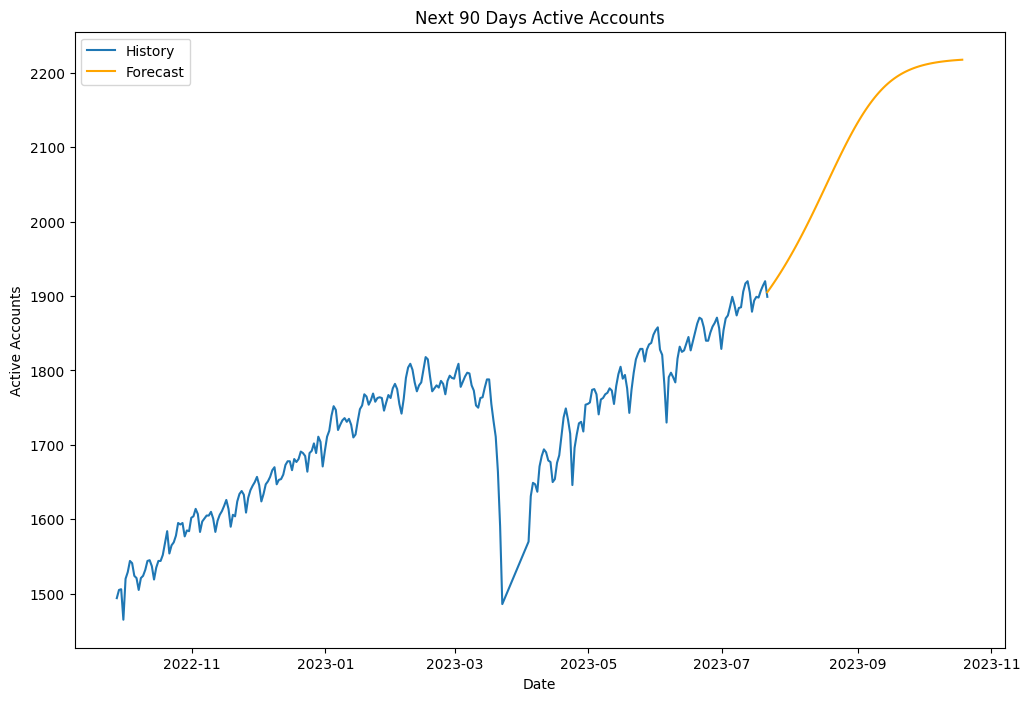

In [ ]:
# Add new dates corresponding to the forecasted values
time1 = np.append(time, pd.date_range(start=time[-1], periods=n, freq='D')[1:])

# Plot
fig, ax = plt.subplots(figsize=(12, 8)) 
ax.plot(time[1:], e_data, label='History') 
ax.plot(time1[-n:], forecast, label='Forecast', color='orange')
ax.set(title='Next 90 Days Active Accounts', xlabel='Date', ylabel='Active Accounts')
ax.legend()
plt.show()

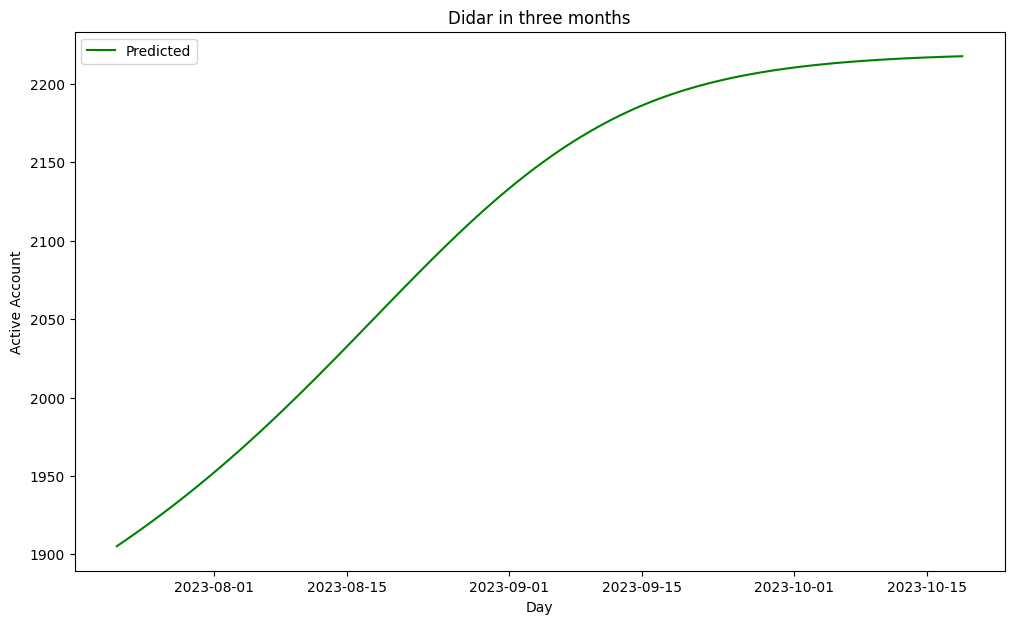

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7)) 
ax.plot(time1[-n:], forecast, color='green', label = 'Predicted')
plt.title('Didar in three months')
plt.xlabel('Day')
plt.ylabel('Active Account')
plt.legend()
plt.show()